#  <center> HEALTHCARE CAPSTONE PROJECT </center> </font>

## BUSSINESS UNDERSTANDING

- The Centres for Medicare & Medicaid Services (CMS), a federal agency based in the US, is responsible for administering the country’s major healthcare programs, including Medicare and Medicaid. CMS collects, analyses the data and produces research reports. It then works to eliminate the instances of fraud and abuse within the healthcare system. The agency aims to provide a healthcare system with better care, access to coverage and improved health services to the citizens. CMS also aims to reduce the overall health costs such as hospital expenses and insurance premiums for the citizens.
- The CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by various hospitals.
- The ratings directly influence the consumers’ choice of hospitals and may significantly impact hospitals' revenues.

## OBJECTIVE

- Evanston Hospital is a comprehensive acute-care facility in Illinois, US. The hospital offers a wide range of services and surgical specialities, in addition to having high-end lab capabilities. Despite spending a considerable amount of resources on improving its services, the hospital’s CMS rating has remained at 3 for the past 5 years, and this has led to a steady decline in revenue for the hospital
- These ratings directly influence the choice made by consumers who are looking for a healthcare provider and would, therefore, have a significant impact on the hospitals’ revenues
- Our task is to identify possible root causes for the hospital getting such an average rating and recommend measures to mitigate this problem.

## PROBLEM STATEMENT

- The entire problem statement has been divided into 4 main parts.

- **Part I - Structured Problem Solving (Issue Tree Framework)**
- Evanston Hospital came up to you to discuss the reasons why its profits were not increasing despite investing for improving its services
 - It was found that the Evanston Hospital’s net profit has had a steady decline of around 7% for the last 6 quarters.
 - The team mentioned that the number of customers and insurance companies opting for the hospital's services had declined by around 5% every year for the last 5 years. 
 - The overall number of customers opting for private healthcare had also increased in that region, leading the team at Evanston to believe that a lot of them prefer other hospitals in the city as their healthcare providers.
 - The hospital had conducted a survey 10 months back to identify the reasons for this drop in the number of customers and identified that because of their average CMS rating (which was 3 at that time) most people, as well as insurance providers, are preferring the other better-rated hospitals.
 - To increase the rating, the hospital’s upper management decided to invest in several new types of equipment, a highly trained staff, and even set up a new lab for thorough testing of high-risk obstetrics and also a state of the art Infant Special Care Unit for safe birthing. Despite these changes, the hospital's rating didn't improve.
 - Upon further questioning, it was revealed that the management team at Evanston was actually unaware of which services were affecting its rating the most and the decision for which areas to invest upon was taken based on guesswork and internal discussion only.

- **Part II - Data Understanding and EDA**
 - The possible root causes for Evanston Hospital not being able to improve its rating  is that the hospital is not aware of the factors that are possibly affecting its rating significantly.
 - By Conducting univariate and bivariate analysis on data to identify patterns, and using it to identify areas of improvement for Evanston Hospital.

- **Part III - Model Building and Evaluation**
 - Train/Test Split- Use the stratified k-fold cross-validation method and choose an appropriate k value so that the minority class is correctly represented in the test folds.
 - Model-Building/Hyperparameter Tuning:Try out different models and fine-tune their hyperparameters until the desired level of performance on the given dataset.
 - Model Evaluation: Evaluate the models using appropriate evaluation metrics
 - Provider Analysis: For Evanston Hospital, identify the key features which they need to work upon to improve their ratings.

- **Part IV: Recommendations**
 - Provide Final Recommendation to the Evanston Hospital to help them to improve their rating.

### IMPORTING THE LIBRARY

In [1]:
# Importing the required libraray
import numpy as np, pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import StratifiedKFold
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

- As the CMS is rating the hosiptal based on 7 measure so importing all 7 measure dataset to do cleaning simulatneously 
- The 7 measure are as follows and Hospital General Info file
   - Moratily
   - Safety of Care
   - Readmission 
   - Patient Experience
   - Effectiveness of Care 
   - Timeliness of Care 
   - Efficient Use of Medical Imaging

# STEP 1 - IMPORTING THE DATASET
- Importing all the required file

In [2]:
# Importing the dataset (Hospital General Info)
main_db=pd.read_csv("Hospital General Information.csv",encoding="ISO-8859-1")
complication_db=pd.read_csv("Complications - Hospital.csv",encoding="ISO-8859-1")
Healthcare_infection_db=pd.read_csv("Healthcare Associated Infections - Hospital.csv",encoding="ISO-8859-1")
HCAHPS_db=pd.read_csv("HCAHPS - Hospital.csv",encoding="ISO-8859-1")
Readmission_db=pd.read_csv("Readmissions and Deaths - Hospital.csv",encoding="ISO-8859-1")
Timely_care_db=pd.read_csv("Timely and Effective Care - Hospital.csv",encoding="ISO-8859-1")
Imaging_efficiency_db=pd.read_csv("Outpatient Imaging Efficiency - Hospital.csv",encoding="ISO-8859-1")

In [3]:
# Now Checking the Dtype of main_db
main_db.dtypes

Provider ID                                                       int64
Hospital Name                                                    object
Address                                                          object
City                                                             object
State                                                            object
ZIP Code                                                          int64
County Name                                                      object
Phone Number                                                      int64
Hospital Type                                                    object
Hospital Ownership                                               object
Emergency Services                                               object
Meets criteria for meaningful use of EHRs                        object
Hospital overall rating                                          object
Hospital overall rating footnote                                

In [4]:
# Checking the Null value in Main_db
main_db.isnull().sum()

Provider ID                                                         0
Hospital Name                                                       0
Address                                                             0
City                                                                0
State                                                               0
ZIP Code                                                            0
County Name                                                        15
Phone Number                                                        0
Hospital Type                                                       0
Hospital Ownership                                                  0
Emergency Services                                                  0
Meets criteria for meaningful use of EHRs                         435
Hospital overall rating                                             0
Hospital overall rating footnote                                 3476
Mortality national c

- As we can observe there are some value Not Available so changing it to Nan value

In [5]:
# Replacing the Not Available value in each cell with NAN value for easy of analysis
main_db=main_db.replace("Not Available",np.NAN)
complication_db=complication_db.replace("Not Available",np.NAN)
Healthcare_infection_db=Healthcare_infection_db.replace("Not Available",np.NAN)
HCAHPS_db=HCAHPS_db.replace("Not Available",np.NAN)
Readmission_db=Readmission_db.replace("Not Available",np.NAN)
Timely_care_db=Timely_care_db.replace("Not Available",np.NAN)
Imaging_efficiency_db=Imaging_efficiency_db.replace("Not Available",np.NAN)

# Step 2 - DATA CLEANING

### Main_db

In [6]:
# Checking the dataset again
main_db.head(1)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN


In [7]:
# Now Reset the index as Provider ID is the unique id 
main_db.set_index("Provider ID", inplace=True)
main_db.head(2)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN


In [8]:
# Dropping the redundant columns
main_db=main_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Hospital Name","Meets criteria for meaningful use of EHRs"], axis=1)
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
Provider ID,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN


In [9]:
# Now Checking the shape of main_db
main_db.shape

(4818, 19)

In [10]:
# Checking the null value in main_db
(main_db.isnull().sum()/len(main_db))*100

Hospital Type                                                     0.000000
Hospital Ownership                                                0.000000
Emergency Services                                                0.000000
Hospital overall rating                                          24.283935
Hospital overall rating footnote                                 72.146119
Mortality national comparison                                    27.750104
Mortality national comparison footnote                           72.249896
Safety of care national comparison                               39.269406
Safety of care national comparison footnote                      60.730594
Readmission national comparison                                  20.797011
Readmission national comparison footnote                         79.202989
Patient experience national comparison                           28.123703
Patient experience national comparison footnote                  71.876297
Effectiveness of care nat

- Dropping column having footnote as they are of no use for analysis and have more null values

In [11]:
# Dropping the footnote columns
main_db = main_db[main_db.columns.drop(list(main_db.filter(regex='footnote')))]

In [12]:
# checking the shape of main_db
main_db.shape

(4818, 11)

In [13]:
# Checking for dtype 
main_db.dtypes

Hospital Type                                           object
Hospital Ownership                                      object
Emergency Services                                      object
Hospital overall rating                                 object
Mortality national comparison                           object
Safety of care national comparison                      object
Readmission national comparison                         object
Patient experience national comparison                  object
Effectiveness of care national comparison               object
Timeliness of care national comparison                  object
Efficient use of medical imaging national comparison    object
dtype: object

- Here we can observe that Hospital Rating is object dtype so now changing it dtype to numerical

In [14]:
# Changing the dtype of Hospital Rating column to numerical dtype
main_db["Hospital overall rating"]=pd.to_numeric(main_db["Hospital overall rating"])

In [15]:
# Checking for dtype 
main_db.dtypes

Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                       object
Hospital overall rating                                 float64
Mortality national comparison                            object
Safety of care national comparison                       object
Readmission national comparison                          object
Patient experience national comparison                   object
Effectiveness of care national comparison                object
Timeliness of care national comparison                   object
Efficient use of medical imaging national comparison     object
dtype: object

### Compliation_db

In [16]:
# Checking the complication_db
complication_db.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015


In [17]:
# Setting the Provider Id as column index
complication_db.set_index("Provider ID", inplace=True)
complication_db.head(2)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
Provider ID,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015


In [18]:
# Dropping the redundant columns
complication_db=complication_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Footnote","Measure Start Date","Measure End Date"], axis=1)
complication_db.head(2)

,Hospital Name,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
Provider ID,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5
10001,SOUTHEAST ALABAMA MEDICAL CENTER,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38


In [19]:
# checking the shape 
complication_db.shape

(52998, 8)

### Healthcare_infection_db

In [20]:
# Checking the Healthcare_infection_db
Healthcare_infection_db.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015


In [21]:
# Setting the Provider Id as column index
Healthcare_infection_db.set_index("Provider ID", inplace=True)
Healthcare_infection_db.head(2)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
Provider ID,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03,NaN,1/1/2015,12/31/2015
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015


In [22]:
# Dropping the redundant columns
Healthcare_infection_db=Healthcare_infection_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Footnote","Measure Start Date","Measure End Date"], axis=1)
Healthcare_infection_db.head(2)

,Hospital Name,Measure Name,Measure ID,Compared to National,Score
Provider ID,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03
10001,SOUTHEAST ALABAMA MEDICAL CENTER,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765


In [23]:
# checking the shape
Healthcare_infection_db.shape

(231264, 5)

In [24]:
# Checking for dtype 
Healthcare_infection_db.dtypes

Hospital Name           object
Measure Name            object
Measure ID              object
Compared to National    object
Score                   object
dtype: object

- Here we can observe that the Score column dtype is object so changing the dtype to numerical dtype.

In [25]:
# Changing the dtype of Score to numerical dtype
Healthcare_infection_db["Score"]=pd.to_numeric(Healthcare_infection_db["Score"])

In [26]:
# Checking the dtype once
Healthcare_infection_db.dtypes

Hospital Name            object
Measure Name             object
Measure ID               object
Compared to National     object
Score                   float64
dtype: object

### HCAHPS_db

In [27]:
# Checking the HCAHPS_db
HCAHPS_db.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [28]:
# Setting the Provider Id as column index
HCAHPS_db.set_index("Provider ID", inplace=True)
HCAHPS_db.head(2)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [29]:
# Dropping the redundant columns
HCAHPS_db=HCAHPS_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Survey Response Rate Percent","Number of Completed Surveys","Measure Start Date","Measure End Date"], axis=1)
HCAHPS_db.head(2)

,Hospital Name,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys Footnote,Survey Response Rate Percent Footnote
Provider ID,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,NaN,NaN
10001,SOUTHEAST ALABAMA MEDICAL CENTER,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,NaN,NaN


In [30]:
# Checking the shape
HCAHPS_db.shape

(264990, 11)

In [31]:
# Checking dtype
HCAHPS_db.dtypes

Hospital Name                            object
HCAHPS Measure ID                        object
HCAHPS Question                          object
HCAHPS Answer Description                object
Patient Survey Star Rating               object
Patient Survey Star Rating Footnote      object
HCAHPS Answer Percent                    object
HCAHPS Answer Percent Footnote           object
HCAHPS Linear Mean Value                 object
Number of Completed Surveys Footnote     object
Survey Response Rate Percent Footnote    object
dtype: object

- Here we can observe that the Patient survey star rating column dtype is object so changing the dtype to numerical dtype but before once checking the Patient survey star rating column

In [32]:
# Checking the Patient survey star rating column
HCAHPS_db["Patient Survey Star Rating"].value_counts()

Not Applicable    207174
3                  15388
4                  13096
2                   8201
5                   3344
1                   2067
Name: Patient Survey Star Rating, dtype: int64

- Here we observe that some value in Patient Survey Star Rating is Not Applicable so replacing it with NaN value 

In [33]:
# Changing the Not Applicable in Patient Survey rating column to NaN value
HCAHPS_db=HCAHPS_db.replace("Not Applicable",np.NAN)

# Again Checking the Patient survey star rating column.
HCAHPS_db["Patient Survey Star Rating"].value_counts()

3    15388
4    13096
2     8201
5     3344
1     2067
Name: Patient Survey Star Rating, dtype: int64

In [34]:
# Changing the dtype of Patient Survey star rating to numerical dtype
HCAHPS_db["Patient Survey Star Rating"]=pd.to_numeric(HCAHPS_db["Patient Survey Star Rating"])

In [35]:
# Checking the dtype once
HCAHPS_db.dtypes

Hospital Name                             object
HCAHPS Measure ID                         object
HCAHPS Question                           object
HCAHPS Answer Description                 object
Patient Survey Star Rating               float64
Patient Survey Star Rating Footnote       object
HCAHPS Answer Percent                     object
HCAHPS Answer Percent Footnote            object
HCAHPS Linear Mean Value                  object
Number of Completed Surveys Footnote      object
Survey Response Rate Percent Footnote     object
dtype: object

### Readmission_df

In [36]:
# Checking the Readmission dataset
Readmission_db.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015


In [37]:
# Setting the Provider Id as column index
Readmission_db.set_index("Provider ID", inplace=True)
Readmission_db.head(2)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
Provider ID,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015


In [38]:
# Dropping all redundunt columns
Readmission_db=Readmission_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Footnote","Measure Start Date","Measure End Date"],axis=1)
Readmission_db.shape

(67452, 8)

In [39]:
# Checking the dtype 
Readmission_db.dtypes

Hospital Name           object
Measure Name            object
Measure ID              object
Compared to National    object
Denominator             object
Score                   object
Lower Estimate          object
Higher Estimate         object
dtype: object

- Here we can observe that the Score column dtype is object so changing the dtype to numerical dtype 

In [40]:
# Changing the Score colum to numerical dtype from object dtype
Readmission_db["Score"]=pd.to_numeric(Readmission_db["Score"])

In [41]:
# Checking the dtype once
Readmission_db.dtypes

Hospital Name            object
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                   float64
Lower Estimate           object
Higher Estimate          object
dtype: object

### Timely and effective care

In [42]:
# Checking the Timely_db
Timely_care_db.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,NaN,NaN,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015


In [43]:
# Setting the Provider Id as column index
Timely_care_db.set_index("Provider ID", inplace=True)
Timely_care_db.head(2)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
Provider ID,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,NaN,NaN,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015


In [44]:
# Dropping all redundunt columns
Timely_care_db=Timely_care_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Footnote","Measure Start Date","Measure End Date"],axis=1)
Timely_care_db.shape

(207174, 6)

In [45]:
# Checking the dtype once
Timely_care_db.dtypes

Hospital Name    object
Condition        object
Measure ID       object
Measure Name     object
Score            object
Sample           object
dtype: object

- Here we can observe that the Score column dtype is object so changing the dtype to numerical dtype but before once checking the Score column

In [46]:
# Checking the Score column once to check any abnormality in column if present.
Timely_care_db["Score"].value_counts()

100                                           14414
99                                             4502
98                                             3912
97                                             2918
0                                              2792
96                                             2430
95                                             1999
94                                             1866
1                                              1510
93                                             1437
92                                             1368
2                                              1177
91                                             1079
Low (0 - 19,999 patients annually)             1072
Medium (20,000 - 39,999 patients annually)      978
90                                              921
88                                              855
3                                               762
89                                              713
86          

- Here we cam observe that some abnormality are present in Score so let handle those and then convert the dtype to numerical dtype

In [47]:
# So we will replace those row with NAN value containg the Low (0 - 19,999 patients annually) , Medium (20,000 - 39,999 patients annually) value in Score column
Timely_care_db=Timely_care_db.replace("Low (0 - 19,999 patients annually)" , np.NAN)
Timely_care_db=Timely_care_db.replace("Medium (20,000 - 39,999 patients annually)" , np.NAN)
Timely_care_db=Timely_care_db.replace("Very High (60,000+ patients annually)" , np.NAN)
Timely_care_db=Timely_care_db.replace("High (40,000 - 59,999 patients annually)" , np.NAN)

In [48]:
# Now Dropping the NAN value in Score Column 
Timely_care_db=Timely_care_db.dropna(axis=0,subset=["Score"])

In [49]:
# Checking the Score column once
Timely_care_db["Score"].value_counts()

100     14414
99       4502
98       3912
97       2918
0        2792
96       2430
95       1999
94       1866
1        1510
93       1437
92       1368
2        1177
91       1079
90        921
88        855
3         762
89        713
86        649
4         622
87        606
85        585
82        549
83        525
6         496
5         489
84        480
8         459
80        413
7         401
81        391
79        368
78        361
75        355
10        353
77        342
73        331
76        320
9         308
74        297
64        296
71        283
50        277
60        277
58        271
69        270
67        264
70        252
12        248
72        247
56        246
68        242
62        241
55        238
14        235
65        233
18        229
52        225
48        221
40        219
42        219
11        218
44        217
46        207
38        204
57        203
45        202
54        201
53        200
59        197
36        197
20        197
17    

In [50]:
# Changing the dtype of Score from object to numerical
Timely_care_db["Score"]=pd.to_numeric(Timely_care_db["Score"])

In [51]:
# Checking the dtype once
Timely_care_db.dtypes

Hospital Name    object
Condition        object
Measure ID       object
Measure Name     object
Score             int64
Sample           object
dtype: object

### Imaging Efficiency 

In [52]:
# Checking the Imaging_Efficiency_db
Imaging_efficiency_db.head(1)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015


In [53]:
# Setting the Provider Id as column index
Imaging_efficiency_db.set_index("Provider ID", inplace=True)
Imaging_efficiency_db.head(1)

,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
Provider ID,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015


In [54]:
# Dropping all redundunt columns
Imaging_efficiency_db=Imaging_efficiency_db.drop(["Address","State","City","ZIP Code","County Name","Phone Number","Footnote","Measure Start Date","Measure End Date"],axis=1)
Imaging_efficiency_db.shape

(28908, 4)

In [55]:
# Checking the dtype once
Imaging_efficiency_db.dtypes

Hospital Name    object
Measure ID       object
Measure Name     object
Score            object
dtype: object

- Here we can observe that the Score column dtype is object so changing the dtype to numerical dtype.

In [56]:
# Changing the Score colum to numerical dtype from object dtype
Imaging_efficiency_db["Score"]=pd.to_numeric(Imaging_efficiency_db["Score"])

In [57]:
# Checking teh dtype once
Imaging_efficiency_db.dtypes

Hospital Name     object
Measure ID        object
Measure Name      object
Score            float64
dtype: object

- Now all the 7 database cleaned and ready for analysis


In [58]:
# Now we will form an new database having only relevant data for analysis 
#    ----------------------------------------------------------------  
#    |Provider ID|Measure 1| Measure 2 | Measure 3 | .......|Measure X|
#    ------------------------------------------------------------------
#    | Provider ID| Score   |   Score   |  Score    | ......| Score|    

# And then merging all  measure with the main_db

## Creating New DataBase

### Mortality Measure

In [59]:
# Checking the readmission and mortality dataset
Readmission_db.head(1)

,Hospital Name,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
Provider ID,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9


In [60]:
# Creating table 
Readmission_New_db=pd.pivot_table(data=Readmission_db,
                      index="Provider ID",
                      columns=["Measure ID"],
                      values="Score")


In [61]:
# Checking the  Readmission_New_db
Readmission_New_db.head(1)

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7


In [62]:
# Making list of required Measure
Readmission_measure=['MORT_30_AMI','MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK']

In [63]:
# Subsetting the Measure in Readmission_new_db
db_1=Readmission_New_db[Readmission_measure]
db_1.head(1)

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK
Provider ID,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4


In [64]:
# Now checking the Complication dataset
complication_db.head(1)

,Hospital Name,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate
Provider ID,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5


In [65]:
# Creating New table
complication_new_db=pd.pivot_table(data=complication_db,
                      index="Provider ID",
                      columns=["Measure ID"],
                      values="Score")

In [66]:
# Checking the Complication_new_db
complication_new_db.head(1)

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Provider ID,,,,,,,,,,,
10001,3.8,3.32,5.72,2.72,1.35,0.07,168.26,0.36,0.12,0.06,0.68


In [67]:
# creating the list of required measure
complication_measure=["PSI_4_SURG_COMP"]

In [68]:
# Subsetting the Measure in complication_new_db
db_2=complication_new_db[complication_measure]
db_2.head(1)

Measure ID,PSI_4_SURG_COMP
Provider ID,
10001,168.26


In [69]:
# Now Concating the two tables with main_db
main_db=pd.concat([main_db,db_1,], axis=1)

main_db=pd.concat([main_db,db_2,], axis=1)

In [70]:
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
Provider ID,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05


### Safety of Care Measure

In [71]:
# Healthcare infection dataset
Healthcare_infection_db.head(2)

,Hospital Name,Measure Name,Measure ID,Compared to National,Score
Provider ID,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.030
10001,SOUTHEAST ALABAMA MEDICAL CENTER,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765


In [72]:
# Now Creating the new table of Healthcare infection measure
Healthcare_infection_new_db=pd.pivot_table(data=Healthcare_infection_db,
                               index=["Provider ID"],
                               columns="Measure ID",
                               values="Score")

In [73]:
# Checking the Healthcare_infection_new_db
Healthcare_infection_new_db.head(2)

Measure ID,HAI_1_CI_LOWER,HAI_1_CI_UPPER,HAI_1_DOPC_DAYS,HAI_1_ELIGCASES,HAI_1_NUMERATOR,HAI_1_SIR,HAI_1a_CI_LOWER,HAI_1a_CI_UPPER,HAI_1a_DOPC_DAYS,HAI_1a_ELIGCASES,HAI_1a_NUMERATOR,HAI_1a_SIR,HAI_2_CI_LOWER,HAI_2_CI_UPPER,HAI_2_DOPC_DAYS,HAI_2_ELIGCASES,HAI_2_NUMERATOR,HAI_2_SIR,HAI_2a_CI_LOWER,HAI_2a_CI_UPPER,HAI_2a_DOPC_DAYS,HAI_2a_ELIGCASES,HAI_2a_NUMERATOR,HAI_2a_SIR,HAI_3_CI_LOWER,HAI_3_CI_UPPER,HAI_3_DOPC_DAYS,HAI_3_ELIGCASES,HAI_3_NUMERATOR,HAI_3_SIR,HAI_4_CI_LOWER,HAI_4_CI_UPPER,HAI_4_DOPC_DAYS,HAI_4_ELIGCASES,HAI_4_NUMERATOR,HAI_4_SIR,HAI_5_CI_LOWER,HAI_5_CI_UPPER,HAI_5_DOPC_DAYS,HAI_5_ELIGCASES,HAI_5_NUMERATOR,HAI_5_SIR,HAI_6_CI_LOWER,HAI_6_CI_UPPER,HAI_6_DOPC_DAYS,HAI_6_ELIGCASES,HAI_6_NUMERATOR,HAI_6_SIR
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,1.030,2.765,7117.0,9.198,16.0,1.740,1.130,4.620,2191.0,3.288,8.0,2.433,0.974,2.023,14326.0,20.321,29.0,1.427,1.410,3.575,6502.0,7.803,18.0,2.307,0.950,3.334,156.0,5.347,10.0,1.870,NaN,1.741,154.0,1.721,0.0,0.0,0.107,1.148,83773.0,7.111,3.0,0.422,0.562,1.073,81130.0,47.018,37.0,0.787
10005,0.337,2.561,2786.0,3.767,4.0,1.062,0.032,3.196,1028.0,1.543,1.0,0.648,0.167,1.011,7368.0,10.965,5.0,0.456,0.178,1.900,3305.0,4.297,3.0,0.698,0.019,1.901,74.0,2.594,1.0,0.386,NaN,NaN,43.0,0.454,0.0,NaN,0.233,4.585,36123.0,1.441,2.0,1.388,0.177,0.801,36262.0,17.293,7.0,0.405


In [74]:
# Creating the list of required measure
Healthcare_infection_measure=["HAI_1_SIR","HAI_2_SIR","HAI_3_SIR","HAI_4_SIR","HAI_5_SIR","HAI_6_SIR"]

In [75]:
# Subsetting the dataset
db_3=Healthcare_infection_new_db[Healthcare_infection_measure]
db_3.head(2)

Measure ID,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR
Provider ID,,,,,,
10001,1.740,1.427,1.870,0.0,0.422,0.787
10005,1.062,0.456,0.386,NaN,1.388,0.405


In [76]:
# Complication Dataset
complication_new_db.head(2)

Measure ID,COMP_HIP_KNEE,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_7_CVCBI,PSI_8_POST_HIP,PSI_90_SAFETY
Provider ID,,,,,,,,,,,
10001,3.8,3.32,5.72,2.72,1.35,0.07,168.26,0.36,0.12,0.06,0.68
10005,3.0,5.63,9.18,2.11,1.25,0.14,179.05,0.47,0.11,0.06,0.85


In [77]:
# Creating the measure list
complication_measure=["PSI_90_SAFETY"]

In [78]:
# Subsetting the dataset
db_4=complication_new_db[complication_measure]
db_4.head(2)

Measure ID,PSI_90_SAFETY
Provider ID,
10001,0.68
10005,0.85


In [79]:
# Now Concating the dataset to main_db
main_db=pd.concat([main_db,db_3],axis=1)
main_db=pd.concat([main_db,db_4],axis=1)

In [80]:
# Checking the main_db
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85


### Readmission Measure

In [81]:
# Checking the readmission_new_db
Readmission_New_db.head(2)

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4


In [82]:
list(Readmission_New_db.columns)

['MORT_30_AMI',
 'MORT_30_CABG',
 'MORT_30_COPD',
 'MORT_30_HF',
 'MORT_30_PN',
 'MORT_30_STK',
 'READM_30_AMI',
 'READM_30_CABG',
 'READM_30_COPD',
 'READM_30_HF',
 'READM_30_HIP_KNEE',
 'READM_30_HOSP_WIDE',
 'READM_30_PN',
 'READM_30_STK']

In [83]:
# Creating the measure list
Readmission_measure=['READM_30_AMI','READM_30_CABG','READM_30_COPD','READM_30_HF','READM_30_HIP_KNEE','READM_30_PN','READM_30_STK']

In [84]:
# Subsetting the dataset
db_5=Readmission_New_db[Readmission_measure]
db_5.head()

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,
10001,16.5,15.1,21.1,21.4,5.1,18.7,12.7
10005,16.7,NaN,18.0,21.9,5.7,16.4,13.4
10006,16.1,15.2,19.8,20.6,5.0,17.9,12.0
10007,NaN,NaN,19.9,21.1,NaN,17.3,12.7
10008,NaN,NaN,19.2,23.1,NaN,16.0,NaN


In [85]:
# Now Concating the db_5 with main_db
main_db=pd.concat([main_db,db_5],axis=1)
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4


### Patient Experience Measure

In [86]:
# Checking the HCAHPS dataset
HCAHPS_db.head(2)

,Hospital Name,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys Footnote,Survey Response Rate Percent Footnote
Provider ID,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,H_STAR_RATING,Summary star rating,Summary star rating,3.0,NaN,NaN,NaN,NaN,NaN,NaN
10001,SOUTHEAST ALABAMA MEDICAL CENTER,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",NaN,NaN,66,NaN,NaN,NaN,NaN


In [87]:
# Creating new table
HCAHPS_new_db=pd.pivot_table(data=HCAHPS_db,
                            index=["Provider ID"],
                            columns="HCAHPS Measure ID",
                            values="Patient Survey Star Rating")

In [88]:
# Checking the new db
HCAHPS_new_db.head(2)

HCAHPS Measure ID,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_HSP_RATING_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,H_STAR_RATING
Provider ID,,,,,,,,,,,,
10001,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0
10005,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,3.0


In [89]:
# Creating the list of required measure
HCAHPS_measure=['H_CLEAN_STAR_RATING','H_COMP_1_STAR_RATING','H_COMP_2_STAR_RATING','H_COMP_3_STAR_RATING','H_COMP_4_STAR_RATING',
                'H_COMP_5_STAR_RATING','H_COMP_6_STAR_RATING','H_COMP_7_STAR_RATING','H_QUIET_STAR_RATING','H_RECMND_STAR_RATING']

In [90]:
# Subsetting the dataset
db_6=HCAHPS_new_db[HCAHPS_measure]
db_6.head(2)

HCAHPS Measure ID,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING
Provider ID,,,,,,,,,,
10001,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0
10005,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0


In [91]:
# Now Concating the db_6 with main_db
main_db=pd.concat([main_db,db_6],axis=1)
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0


### Effectiveness of Care Measure

In [92]:
# Checking the timely and effective care dataset
Timely_care_db.head(2)

,Hospital Name,Condition,Measure ID,Measure Name,Score,Sample
Provider ID,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24
10001,SOUTHEAST ALABAMA MEDICAL CENTER,Emergency Department,ED_1b,ED1,269,535


In [93]:
# Creating the new table
Timely_care_new_db=pd.pivot_table(data=Timely_care_db,
                                 index=["Provider ID"],
                                 columns="Measure ID",
                                 values="Score")

In [94]:
# Checking the new db
Timely_care_new_db.head(2)

Measure ID,AMI_7a,AMI_8a,CAC_3,ED_1b,ED_2b,HF_2,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_1,OP_18b,OP_2,OP_20,OP_21,OP_22,OP_23,OP_29,OP_30,OP_3b,OP_4,OP_5,PC_01,PN_6,SCIP_CARD_2,SCIP_INF_1,SCIP_INF_2,SCIP_INF_3,SCIP_INF_9,SCIP_VTE_2,STK_1,STK_10,STK_2,STK_3,STK_4,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_4,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,NaN,92.0,NaN,269.0,68.0,100.0,97.0,81.0,NaN,196.0,NaN,65.0,99.0,4.0,NaN,NaN,82.0,NaN,NaN,NaN,0.0,98.0,98.0,100.0,100.0,99.0,96.0,100.0,99.0,96.0,100.0,NaN,67.0,98.0,99.0,87.0,97.0,99.0,91.0,NaN,90.0,0.0
10005,NaN,NaN,NaN,243.0,71.0,97.0,99.0,83.0,NaN,117.0,NaN,27.0,60.0,2.0,86.0,92.0,92.0,NaN,99.0,12.0,1.0,98.0,100.0,100.0,99.0,100.0,100.0,100.0,98.0,99.0,100.0,100.0,NaN,99.0,88.0,100.0,95.0,94.0,100.0,100.0,100.0,NaN


In [95]:
# Creating the measure list
Effecive_measure = ['IMM_2', 'OP_22', 'OP_23','OP_29', 
                              'OP_30', 'PC_01', 'VTE_6']


In [96]:
# Subsetting the dataset
db_7=Timely_care_new_db[Effecive_measure]
db_7.head(2)

Measure ID,IMM_2,OP_22,OP_23,OP_29,OP_30,PC_01,VTE_6
Provider ID,,,,,,,
10001,97.0,4.0,NaN,NaN,82.0,0.0,0.0
10005,99.0,2.0,86.0,92.0,92.0,1.0,NaN


In [97]:
# Concating the db_7 with maib_db
main_db=pd.concat([main_db,db_7], axis=1)
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,IMM_2,OP_22,OP_23,OP_29,OP_30,PC_01,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,NaN,NaN,82.0,0.0,0.0
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.0,92.0,92.0,1.0,NaN


### Timeliness of care Measure

In [98]:
# Checking the Timely_care_new_db
Timely_care_new_db.head(2)

Measure ID,AMI_7a,AMI_8a,CAC_3,ED_1b,ED_2b,HF_2,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_1,OP_18b,OP_2,OP_20,OP_21,OP_22,OP_23,OP_29,OP_30,OP_3b,OP_4,OP_5,PC_01,PN_6,SCIP_CARD_2,SCIP_INF_1,SCIP_INF_2,SCIP_INF_3,SCIP_INF_9,SCIP_VTE_2,STK_1,STK_10,STK_2,STK_3,STK_4,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_4,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,NaN,92.0,NaN,269.0,68.0,100.0,97.0,81.0,NaN,196.0,NaN,65.0,99.0,4.0,NaN,NaN,82.0,NaN,NaN,NaN,0.0,98.0,98.0,100.0,100.0,99.0,96.0,100.0,99.0,96.0,100.0,NaN,67.0,98.0,99.0,87.0,97.0,99.0,91.0,NaN,90.0,0.0
10005,NaN,NaN,NaN,243.0,71.0,97.0,99.0,83.0,NaN,117.0,NaN,27.0,60.0,2.0,86.0,92.0,92.0,NaN,99.0,12.0,1.0,98.0,100.0,100.0,99.0,100.0,100.0,100.0,98.0,99.0,100.0,100.0,NaN,99.0,88.0,100.0,95.0,94.0,100.0,100.0,100.0,NaN


In [99]:
# Creating the measure list
Timely_measure=["ED_1b","ED_2b","OP_3b","OP_18b","OP_20","OP_21","OP_5"]

In [100]:
# Subsetting the dataset
db_8=Timely_care_new_db[Timely_measure]
db_8.head(2)

Measure ID,ED_1b,ED_2b,OP_3b,OP_18b,OP_20,OP_21,OP_5
Provider ID,,,,,,,
10001,269.0,68.0,NaN,196.0,65.0,99.0,NaN
10005,243.0,71.0,NaN,117.0,27.0,60.0,12.0


In [101]:
# Now concating the db_8 with main_db
main_db=pd.concat([main_db,db_8],axis=1)
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,IMM_2,OP_22,OP_23,OP_29,OP_30,PC_01,VTE_6,ED_1b,ED_2b,OP_3b,OP_18b,OP_20,OP_21,OP_5
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,NaN,NaN,82.0,0.0,0.0,269.0,68.0,NaN,196.0,65.0,99.0,NaN
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.0,92.0,92.0,1.0,NaN,243.0,71.0,NaN,117.0,27.0,60.0,12.0


### Efficient Use of Medical Imaging Measure

In [102]:
# Checking the Outpatient Imaging efficiency dataste
Imaging_efficiency_db.head(2)

,Hospital Name,Measure ID,Measure Name,Score
Provider ID,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,OP_10,Abdomen CT Use of Contrast Material,6.4
10001,SOUTHEAST ALABAMA MEDICAL CENTER,OP_11,Thorax CT Use of Contrast Material,0.9


In [103]:
# Creating the new table
db_9=pd.pivot_table(data=Imaging_efficiency_db,
                   index=["Provider ID"],
                   columns="Measure ID",
                   values="Score")
db_9.head(2)

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8,OP_9
Provider ID,,,,,,
10001,6.4,0.9,7.1,2.4,38.1,6.9
10005,13.3,10.2,5.3,4.0,42.8,5.1


In [104]:
# Creating the measure list
Efficiency_measure=['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'OP_9']

In [105]:
# Concating the db_9 with main_db
main_db=pd.concat([main_db,db_9],axis=1)
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,IMM_2,OP_22,OP_23,OP_29,OP_30,PC_01,VTE_6,ED_1b,ED_2b,OP_3b,OP_18b,OP_20,OP_21,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8,OP_9
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,NaN,NaN,82.0,0.0,0.0,269.0,68.0,NaN,196.0,65.0,99.0,NaN,6.4,0.9,7.1,2.4,38.1,6.9
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.0,92.0,92.0,1.0,NaN,243.0,71.0,NaN,117.0,27.0,60.0,12.0,13.3,10.2,5.3,4.0,42.8,5.1


## Final Dataset

In [106]:
# So Now Checking the final dataset
main_db.head()

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_PN,READM_30_STK,H_CLEAN_STAR_RATING,H_COMP_1_STAR_RATING,H_COMP_2_STAR_RATING,H_COMP_3_STAR_RATING,H_COMP_4_STAR_RATING,H_COMP_5_STAR_RATING,H_COMP_6_STAR_RATING,H_COMP_7_STAR_RATING,H_QUIET_STAR_RATING,H_RECMND_STAR_RATING,IMM_2,OP_22,OP_23,OP_29,OP_30,PC_01,VTE_6,ED_1b,ED_2b,OP_3b,OP_18b,OP_20,OP_21,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8,OP_9
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,NaN,NaN,82.0,0.0,0.0,269.0,68.0,NaN,196.0,65.0,99.0,NaN,6.4,0.9,7.1,2.4,38.1,6.9
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.0,92.0,92.0,1.0,NaN,243.0,71.0,NaN,117.0,27.0,60.0,12.0,13.3,10.2,5.3,4.0,42.8,5.1
10006,Acute Care Hospitals,Government - Hospital District or Authority,Yes,2.0,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average,16.7,4.1,7.1,15.6,18.2,17.9,198.33,0.341,0.641,0.310,NaN,1.261,0.513,0.91,16.1,15.2,19.8,20.6,5.0,17.9,12.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,2.0,4.0,2.0,100.0,1.0,NaN,70.0,88.0,0.0,0.0,217.0,78.0,NaN,133.0,10.0,58.0,NaN,11.8,4.6,0.0,4.6,45.6,9.1
10007,Acute Care Hospitals,Voluntary non-profit - Private,Yes,3.0,Same as the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Above the National average,NaN,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,0.000,NaN,NaN,NaN,0.000,0.79,NaN,NaN,19.9,21.1,NaN,17.3,12.7,3.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,5.0,3.0,99.0,1.0,NaN,0.0,0.0,NaN,NaN,219.0,68.0,NaN,119.0,38.0,90.0,7.0,24.3,6.1,NaN,NaN,NaN,20.7
10008,Acute Care Hospitals,Proprietary,Yes,3.0,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,Above the National average,NaN,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585,0.90,NaN,NaN,19.2,23.1,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,1.0,NaN,96.0,97.0,NaN,NaN,180.0,56.0,NaN,98.0,27.0,49.0,NaN,3.6,NaN,NaN,0.6,NaN,8.2


In [107]:
# Rename the column for ease of analysis
main_db=main_db.rename(columns={"MORT_30_AMI":"Mortality_30_AMI",
                                "MORT_30_CABG":"Mortality_30_CABG",
                                "MORT_30_HF":"Moratlity_30_HF",
                               "MORT_30_PN":"Mortality_30_PN",
                                "MORT_30_STK":"Mortality_30_STK",
                                "MORT_30_COPD":"Mortality_30_COPD",
                               "PSI_4_SURG_COMP":"Mortality_PSI_4_SURG_COMP",
                                "HAI_1_SIR":"Safety_of_care_HAI_1_SIR",
                                "HAI_2_SIR":"Safety_of_care_HAI_2_SIR",
                                "HAI_3_SIR":"Safety_of_care_HAI_3_SIR",
                                "HAI_4_SIR":"Safety_of_care_HAI_4_SIR",
                                "HAI_5_SIR":"Safety_of_care_HAI_5_SIR",
                                "HAI_6_SIR":"Safety_of_care_HAI_6_SIR",
                                "PSI_90_SAFETY":"Safety_of_care_PSI_90_SAFETY",
                               "READM_30_AMI":"Readmission_30_AMI",
                               "READM_30_CABG":"Readmission_30_CABG",
                               "READM_30_COPD":"Readmission_30_COPD",
                               "READM_30_HF":"Readmission_30_HF",
                               "READM_30_HIP_KNEE":"Readmission_30_HIP_KNEE",
                               "READM_30_PN":"Readmission_30_PN",
                               "READM_30_STK":"Readmission_30_STK",
                                "READM_30_HF":"Readmission_30_HF",
                               "H_CLEAN_STAR_RATING":"Hospital_Cleaniness_Star_rating",
                               "H_COMP_1_STAR_RATING":"Hospital_Nurse_commnunication_rating",
                               "H_COMP_2_STAR_RATING":"Hospital_Docter_Communication_rating",
                               "H_COMP_3_STAR_RATING":"Hospital_Staff_responsiveness_rating",
                               "H_COMP_4_STAR_RATING":"Hospital_Pain_management_rating",
                               "H_COMP_5_STAR_RATING":"Hospital_medicine_communication_rating",
                               "H_COMP_6_STAR_RATING":"Hospital_Discharge_Information_rating",
                               "H_COMP_7_STAR_RATING":"Hospital_care_transition_rating",
                               "H_QUIET_STAR_RATING":"Hospital_Quietness_rating",
                               "H_RECMND_STAR_RATING":"Hospital_recommanding_rating",
                               "IMM_2":"Effectiveness_of_care_IMM_2",
                               "OP_22":"Effectiveness_of_care_OP_22",
                               "OP_23":"Effectiveness_of_care_OP_23",
                               "OP_29":"Effectiveness_of_care_OP_29",
                               "OP_30":"Effectiveness_of_care_OP_30",
                               "PC_01":"Effectiveness_of_care_PC_01",
                               "VTE_6":"Effectiveness_of_care_VTE_6",
                               "ED_1b":"Timeliness_of_care_ED_1b",
                               "OP_3b":"Timeliness_of_care_OP_3b",
                               "OP_18b":"Timeliness_of_care_OP_18b",
                               "OP_20":"Timeliness_of_care_OP_20",
                               "OP_21":"Timeliness_of_care_OP_21",
                               "OP_5":"Timeliness_of_care_OP_5",
                               "OP_10":"Medical_Imaging_OP_10",
                               "OP_11":"Medical_Imaging_OP_11",
                               "OP_13":"Medical_Imaging_OP_13",
                               "OP_14":"Medical_Imaging_OP_14",
                               "OP_8":"Medical_Imaging_OP_8",
                               "OP_9":"Medical_Imaging_OP_9"})

In [108]:
# Now Again checking the dataset after renaming
main_db.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,NaN,NaN,82.0,0.0,0.0,269.0,68.0,NaN,196.0,65.0,99.0,NaN,6.4,0.9,7.1,2.4,38.1,6.9
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.0,92.0,92.0,1.0,NaN,243.0,71.0,NaN,117.0,27.0,60.0,12.0,13.3,10.2,5.3,4.0,42.8,5.1


### 2.2- Handling the Missing/Null values

In [109]:
# Now Checking for NUll values in main_db
(main_db.isnull().sum()/len(main_db))*100

Hospital Type                                            0.000000
Hospital Ownership                                       0.000000
Emergency Services                                       0.000000
Hospital overall rating                                 24.283935
Mortality national comparison                           27.750104
Safety of care national comparison                      39.269406
Readmission national comparison                         20.797011
Patient experience national comparison                  28.123703
Effectiveness of care national comparison               23.163138
Timeliness of care national comparison                  27.625571
Efficient use of medical imaging national comparison    42.050643
Mortality_30_AMI                                        50.435866
Mortality_30_CABG                                       78.455791
Mortality_30_COPD                                       25.466999
Moratlity_30_HF                                         24.906600
Mortality_

- As we can observe that our target varible is Hospital overall rating has about 24% of null values so to make model robust.
- We have to drop these null values from our target variable.

In [110]:
# Dropping the row of Hospital overall rating 
main_db.dropna(subset=["Hospital overall rating"],inplace=True)

In [111]:
# Now Checking the null value count in main_db
(main_db.isnull().sum()/len(main_db))*100

Hospital Type                                            0.000000
Hospital Ownership                                       0.000000
Emergency Services                                       0.000000
Hospital overall rating                                  0.000000
Mortality national comparison                            7.812500
Safety of care national comparison                      20.367325
Readmission national comparison                          3.399123
Patient experience national comparison                   7.483553
Effectiveness of care national comparison                5.619518
Timeliness of care national comparison                   9.731360
Efficient use of medical imaging national comparison    24.506579
Mortality_30_AMI                                        34.731360
Mortality_30_CABG                                       71.600877
Mortality_30_COPD                                        7.044956
Moratlity_30_HF                                          6.058114
Mortality_

- As we can observe that many columns have have missing values more that 20~25% and as these measure are important to us so we will impute the values to handle the missing values issue

- So first Separating the dataset in categorical and continous so that it will be easy to handle missing value

In [112]:
# Separating the dataset into Target,Categorical and Continous dataset
# First Making Copy of dataset
main_copy_db=main_db

In [113]:
# Splitting the Dataset
y_main_db=main_db.pop("Hospital overall rating") # Target Variable
X_main_db=main_db

In [114]:
# Now Splitting the X_main_db into categorical and continous
# Checking the categorical column present in main_db
main_db.nunique()

Hospital Type                                              2
Hospital Ownership                                        10
Emergency Services                                         2
Mortality national comparison                              3
Safety of care national comparison                         3
Readmission national comparison                            3
Patient experience national comparison                     3
Effectiveness of care national comparison                  3
Timeliness of care national comparison                     3
Efficient use of medical imaging national comparison       3
Mortality_30_AMI                                          84
Mortality_30_CABG                                         54
Mortality_30_COPD                                         78
Moratlity_30_HF                                           96
Mortality_30_PN                                          134
Mortality_30_STK                                         106
Mortality_PSI_4_SURG_COM

In [115]:
# Now Creating Datset of categorical column.
Categorical_columns=['Hospital Type', 'Hospital Ownership', 'Emergency Services','Mortality national comparison', 'Safety of care national comparison','Readmission national comparison',
                    'Patient experience national comparison','Effectiveness of care national comparison','Timeliness of care national comparison','Efficient use of medical imaging national comparison']
Categorical_df=X_main_db[Categorical_columns]

In [116]:
# Checking the Categorical Dataset once
Categorical_df.head(1)

,Hospital Type,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
Provider ID,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average


In [117]:
# Checking the null values in categorical dataset
Categorical_df.isnull().sum()

Hospital Type                                             0
Hospital Ownership                                        0
Emergency Services                                        0
Mortality national comparison                           285
Safety of care national comparison                      743
Readmission national comparison                         124
Patient experience national comparison                  273
Effectiveness of care national comparison               205
Timeliness of care national comparison                  355
Efficient use of medical imaging national comparison    894
dtype: int64

In [118]:
# Imputing the Missing values with the mode  value of that column 
Categorical_df["Mortality national comparison"].fillna(Categorical_df["Mortality national comparison"].mode()[0],inplace=True)
Categorical_df["Safety of care national comparison"].fillna(Categorical_df["Safety of care national comparison"].mode()[0],inplace=True)
Categorical_df["Readmission national comparison"].fillna(Categorical_df["Readmission national comparison"].mode()[0],inplace=True)
Categorical_df["Patient experience national comparison"].fillna(Categorical_df["Patient experience national comparison"].mode()[0],inplace=True)
Categorical_df["Effectiveness of care national comparison"].fillna(Categorical_df["Effectiveness of care national comparison"].mode()[0],inplace=True)
Categorical_df["Timeliness of care national comparison"].fillna(Categorical_df["Timeliness of care national comparison"].mode()[0],inplace=True)
Categorical_df["Efficient use of medical imaging national comparison"].fillna(Categorical_df["Efficient use of medical imaging national comparison"].mode()[0],inplace=True)

In [119]:
# Checking the null values again after imputation with mode
Categorical_df.isnull().sum()

Hospital Type                                           0
Hospital Ownership                                      0
Emergency Services                                      0
Mortality national comparison                           0
Safety of care national comparison                      0
Readmission national comparison                         0
Patient experience national comparison                  0
Effectiveness of care national comparison               0
Timeliness of care national comparison                  0
Efficient use of medical imaging national comparison    0
dtype: int64

In [120]:
# Now Creating Datset of continous column.
X_main_db.drop(Categorical_columns,axis=1,inplace=True)
Continous_df=X_main_db

In [121]:
# Now Checking the continous dataset
Continous_df.head(2)

,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.0,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,NaN,NaN,82.0,0.0,0.0,269.0,68.0,NaN,196.0,65.0,99.0,NaN,6.4,0.9,7.1,2.4,38.1,6.9
10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,NaN,1.388,0.405,0.85,16.7,NaN,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.0,92.0,92.0,1.0,NaN,243.0,71.0,NaN,117.0,27.0,60.0,12.0,13.3,10.2,5.3,4.0,42.8,5.1


In [122]:
# Checking the null values in Continous dataset
(Continous_df.isnull().sum()/len(Continous_df))*100

Mortality_30_AMI                          34.731360
Mortality_30_CABG                         71.600877
Mortality_30_COPD                          7.044956
Moratlity_30_HF                            6.058114
Mortality_30_PN                            3.591009
Mortality_30_STK                          26.973684
Mortality_PSI_4_SURG_COMP                 50.191886
Safety_of_care_HAI_1_SIR                  36.239035
Safety_of_care_HAI_2_SIR                  22.423246
Safety_of_care_HAI_3_SIR                  45.010965
Safety_of_care_HAI_4_SIR                  76.864035
Safety_of_care_HAI_5_SIR                  50.986842
Safety_of_care_HAI_6_SIR                  13.623904
Safety_of_care_PSI_90_SAFETY              16.584430
Readmission_30_AMI                        40.844298
Readmission_30_CABG                       71.902412
Readmission_30_COPD                        6.332237
Readmission_30_HF                          5.674342
Readmission_30_HIP_KNEE                   27.192982
Readmission_

In [123]:
# creating the list of all numerical columns
Continous_columns=Continous_df.columns

In [124]:
# So now we will impute the null value with KNN impute method
knn_impute=KNNImputer(n_neighbors=3)
Continous_df[Continous_columns]=knn_impute.fit_transform(Continous_df[Continous_columns])

In [125]:
# Checking for any null value after knn imputation
Continous_df.isnull().sum()

Mortality_30_AMI                          0
Mortality_30_CABG                         0
Mortality_30_COPD                         0
Moratlity_30_HF                           0
Mortality_30_PN                           0
Mortality_30_STK                          0
Mortality_PSI_4_SURG_COMP                 0
Safety_of_care_HAI_1_SIR                  0
Safety_of_care_HAI_2_SIR                  0
Safety_of_care_HAI_3_SIR                  0
Safety_of_care_HAI_4_SIR                  0
Safety_of_care_HAI_5_SIR                  0
Safety_of_care_HAI_6_SIR                  0
Safety_of_care_PSI_90_SAFETY              0
Readmission_30_AMI                        0
Readmission_30_CABG                       0
Readmission_30_COPD                       0
Readmission_30_HF                         0
Readmission_30_HIP_KNEE                   0
Readmission_30_PN                         0
Readmission_30_STK                        0
Hospital_Cleaniness_Star_rating           0
Hospital_Nurse_commnunication_ra

- As we can observe our both Categorical and Contionus dataset no null value so we will now merge all three dataset to form final dataset to worok on.

In [126]:
# Merging all three dataset
Final_df=pd.concat([Categorical_df,Continous_df,y_main_db], axis=1)

In [127]:
# Checking the final datatset
Final_df.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.200000,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.000000,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,71.666667,82.666667,82.0,0.0,0.0,269.0,68.0,100.666667,196.0,65.0,99.0,5.666667,6.4,0.9,7.1,2.4,38.1,6.9,3.0
10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,3.366667,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,0.734333,1.388,0.405,0.85,16.7,14.5,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.000000,92.000000,92.0,1.0,3.0,243.0,71.0,95.666667,117.0,27.0,60.0,12.000000,13.3,10.2,5.3,4.0,42.8,5.1,3.0


## STEP 3- FEATURE ENGINEERING

### Hospital Column

In [128]:
# Replace the string in Hospital Type column for easy analysis
#  1. Acute Care Hospital --> Acute_Care
#  2. Critical_Access_Hospital --> Critical_Care

# Checking the value count of Hospital type column before replacing string
Final_df["Hospital Type"].value_counts()

Acute Care Hospitals         3061
Critical Access Hospitals     587
Name: Hospital Type, dtype: int64

In [129]:
# Replacing the string
Final_df["Hospital Type"]=Final_df["Hospital Type"].str.replace("Acute Care Hospitals","Acute_Care")
Final_df["Hospital Type"]=Final_df["Hospital Type"].str.replace("Critical Access Hospitals","Critical_Care")

In [130]:
# Once again checking the value count of Hospital type column
Final_df["Hospital Type"].value_counts()

Acute_Care       3061
Critical_Care     587
Name: Hospital Type, dtype: int64

- We can observe that the string in Hospital type column has change to Acute_care and Critical_Care

### Emergency services

In [131]:
# Emergency Service has value in Yes and No string so changing the value to 0 and 1 format.
# Checking the value count of Emergency service
Final_df["Emergency Services"].value_counts()

Yes    3538
No      110
Name: Emergency Services, dtype: int64

In [132]:
# Replacing the value with 0 and 1
mapping={"Yes":1,"No":0}
Final_df["Emergency Services"]=Final_df["Emergency Services"].replace(mapping)

In [133]:
Final_df["Emergency Services"].value_counts()

1    3538
0     110
Name: Emergency Services, dtype: int64

We can observe that the string in Emergency Services column has change to 0 and 1 format.

In [134]:
# Checking the final_df once
Final_df.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute_Care,Government - Hospital District or Authority,1,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,12.5,4.200000,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.000000,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,71.666667,82.666667,82.0,0.0,0.0,269.0,68.0,100.666667,196.0,65.0,99.0,5.666667,6.4,0.9,7.1,2.4,38.1,6.9,3.0
10005,Acute_Care,Government - Hospital District or Authority,1,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,16.0,3.366667,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,0.734333,1.388,0.405,0.85,16.7,14.5,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.000000,92.000000,92.0,1.0,3.0,243.0,71.0,95.666667,117.0,27.0,60.0,12.000000,13.3,10.2,5.3,4.0,42.8,5.1,3.0


In [135]:
# Here we can observe that few catergorical column have few string in there column such as Same as the National average or Above the National average
# So replacing the value with some another string
# Above the National average --> Above
# Below the National average --> Below
# Same as the National average --> Same

mapping={"Above the National average":"Above","Below the National average":"Below","Same as the National average":"Same"}

Final_df["Mortality national comparison"]=Final_df["Mortality national comparison"].replace(mapping)
Final_df["Safety of care national comparison"]=Final_df["Safety of care national comparison"].replace(mapping)
Final_df["Readmission national comparison"]=Final_df["Readmission national comparison"].replace(mapping)
Final_df["Patient experience national comparison"]=Final_df["Patient experience national comparison"].replace(mapping)
Final_df["Effectiveness of care national comparison"]=Final_df["Effectiveness of care national comparison"].replace(mapping)
Final_df["Timeliness of care national comparison"]=Final_df["Timeliness of care national comparison"].replace(mapping)
Final_df["Efficient use of medical imaging national comparison"]=Final_df["Efficient use of medical imaging national comparison"].replace(mapping)

In [136]:
# Checking all colum afer replacing the string.
print(Final_df["Mortality national comparison"].value_counts())
print("*"*100)
print(Final_df["Safety of care national comparison"].value_counts())
print("*"*100)
print(Final_df["Readmission national comparison"].value_counts())
print("*"*100)
print(Final_df["Patient experience national comparison"].value_counts())
print("*"*100)
print(Final_df["Effectiveness of care national comparison"].value_counts())
print("*"*100)
print(Final_df["Timeliness of care national comparison"].value_counts())
print("*"*100)
print(Final_df["Efficient use of medical imaging national comparison"].value_counts())
print("*"*100)

Same     2903
Above     402
Below     343
Name: Mortality national comparison, dtype: int64
****************************************************************************************************
Same     2171
Above     804
Below     673
Name: Safety of care national comparison, dtype: int64
****************************************************************************************************
Same     1977
Below     860
Above     811
Name: Readmission national comparison, dtype: int64
****************************************************************************************************
Same     1416
Above    1135
Below    1097
Name: Patient experience national comparison, dtype: int64
****************************************************************************************************
Same     2202
Above     997
Below     449
Name: Effectiveness of care national comparison, dtype: int64
****************************************************************************************************
Same   

- As we can observe all columns Categorical column having value as same or below or above national average are converted Same, Below , Above string format

In [137]:
# Checking the dataset once 
Final_df.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute_Care,Government - Hospital District or Authority,1,Same,Above,Same,Below,Same,Same,Same,12.5,4.200000,9.3,12.4,15.5,15.4,168.26,1.740,1.427,1.870,0.000000,0.422,0.787,0.68,16.5,15.1,21.1,21.4,5.1,18.7,12.7,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,97.0,4.0,71.666667,82.666667,82.0,0.0,0.0,269.0,68.0,100.666667,196.0,65.0,99.0,5.666667,6.4,0.9,7.1,2.4,38.1,6.9,3.0
10005,Acute_Care,Government - Hospital District or Authority,1,Below,Same,Above,Same,Same,Above,Below,16.0,3.366667,7.6,15.5,20.8,15.5,179.05,1.062,0.456,0.386,0.734333,1.388,0.405,0.85,16.7,14.5,18.0,21.9,5.7,16.4,13.4,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,3.0,99.0,2.0,86.000000,92.000000,92.0,1.0,3.0,243.0,71.0,95.666667,117.0,27.0,60.0,12.000000,13.3,10.2,5.3,4.0,42.8,5.1,3.0


In [138]:
# Checking the shape of Final_df
Final_df.shape

(3648, 62)

In [139]:
# Checking the dtype
Final_df.dtypes

Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                        int64
Mortality national comparison                            object
Safety of care national comparison                       object
Readmission national comparison                          object
Patient experience national comparison                   object
Effectiveness of care national comparison                object
Timeliness of care national comparison                   object
Efficient use of medical imaging national comparison     object
Mortality_30_AMI                                        float64
Mortality_30_CABG                                       float64
Mortality_30_COPD                                       float64
Moratlity_30_HF                                         float64
Mortality_30_PN                                         float64
Mortality_30_STK                        

In [140]:
# Descroptive analysis of Final_df
Final_df.describe()

,Emergency Services,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,0.969846,14.085709,3.190241,8.084978,12.161906,16.397204,15.018914,132.632230,0.431051,0.458119,0.854819,0.799764,0.762349,0.773567,0.880169,16.754989,14.219956,19.989748,21.956506,4.562299,17.131067,12.491575,2.909448,3.585252,3.283260,3.367233,3.188962,3.133498,3.394920,2.703490,3.047606,3.203947,93.657986,1.838085,68.015534,72.933571,80.407803,2.404240,1.822917,280.141630,100.990223,86.143914,142.329770,26.067617,52.774945,8.299890,8.946720,3.217946,4.818686,2.259503,39.856341,8.850731,3.073465
std,0.171033,1.082739,0.534193,1.101559,1.443179,2.125573,1.480703,15.011472,0.451113,0.419075,0.677728,0.464694,0.870024,0.508432,0.166804,0.819545,0.725677,1.255565,1.491817,0.508080,1.473290,0.937413,0.990922,0.918575,1.036924,1.013621,0.794554,0.902691,0.886611,1.028943,1.090525,1.037228,9.282423,1.758552,15.792802,25.383626,20.446910,3.781977,3.319496,95.528897,62.833238,22.918485,40.210557,15.298331,16.846709,4.130135,9.532167,5.486874,1.722267,1.740192,5.626761,4.704105,0.834595
min,0.000000,9.400000,1.400000,4.600000,6.600000,8.700000,9.300000,70.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,13.100000,10.900000,15.900000,16.300000,2.400000,12.900000,9.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,18.000000,50.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,0.000000,1.000000
25%,1.000000,13.400000,2.900000,7.400000,11.200000,15.000000,14.166667,123.415000,0.117667,0.127500,0.392000,0.732667,0.000000,0.418500,0.780000,16.200000,13.766667,19.200000,21.000000,4.300000,16.100000,11.900000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,92.000000,1.000000,58.000000,60.000000,72.000000,0.000000,0.000000,218.000000,60.000000,82.333333,114.000000,16.000000,41.000000,6.000000,3.400000,0.200000,3.800000,0.833333,36.333333,6.200000,3.000000
50%,1.000000,14.066667,3.166667,8.000000,12.100000,

- As we can observe that the numercal column present in Final_df are not on same scale so scaling all of them on one scale for easy analysis


- So we will scale all numerical column with MinMax Scaler 

In [141]:
# Scaling all the continous column to a scale of 100
for col in Continous_columns:
    Final_df[col] = (((Final_df[col])/(Final_df[col].max()))*100).round(2)
Final_df[Continous_columns].head(2)

,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,62.5,50.60,65.96,69.27,57.84,66.09,79.31,33.53,28.24,35.85,0.00,6.01,21.04,31.78,80.10,75.88,80.84,68.37,65.38,75.71,71.75,40.0,60.0,60.0,40.0,60.0,60.0,60.0,60.0,80.0,80.0,97.0,11.76,71.67,82.67,82.0,0.00,0.00,25.97,10.30,25.42,45.79,47.79,69.72,11.33,7.75,1.60,52.21,17.14,60.09,10.73
10005,80.0,40.56,53.90,86.59,77.61,66.52,84.39,20.46,9.02,7.40,15.24,19.78,10.83,39.72,81.07,72.86,68.97,69.97,73.08,66.40,75.71,40.0,60.0,80.0,60.0,60.0,60.0,80.0,40.0,80.0,60.0,99.0,5.88,86.00,92.00,92.0,1.27,3.19,23.46,10.76,24.16,27.34,19.85,42.25,24.00,16.10,18.12,38.97,28.57,67.51,7.93


In [142]:
Final_df[Continous_columns].describe()

,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9
count,3648.000000,3648.000000,3648.000000,3648.00000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,70.428468,38.435669,57.340373,67.94366,61.183564,64.458914,62.515293,8.305422,9.064534,16.388468,16.596946,10.864054,20.678098,41.129548,81.334701,71.456708,76.589013,70.148484,58.490743,69.356834,70.574457,58.188961,71.705014,65.665206,67.344655,63.779241,62.669945,67.898396,54.069794,60.952111,64.078909,93.657963,5.404660,68.015450,72.933627,80.407774,3.043632,1.939082,27.040669,15.301516,21.753695,33.254608,19.167341,37.165625,16.599866,10.831280,5.715899,35.431467,16.139389,62.864635,13.764877
std,5.413667,6.436260,7.812534,8.06233,7.931200,6.354876,7.075403,8.692083,8.291993,12.993215,9.642876,12.398441,13.590695,7.794663,3.978284,3.646557,4.810569,4.766184,6.513683,5.964705,5.296423,19.818449,18.371476,20.738463,20.272406,15.891097,18.053819,17.732209,20.578840,21.810487,20.744514,9.282437,5.172136,15.792827,25.383620,20.446890,4.787041,3.531296,9.220979,9.520249,5.787605,9.394972,11.248768,11.863794,8.260287,11.540195,9.745621,12.663630,12.429821,8.875007,7.315851
min,47.000000,16.870000,32.620000,36.87000,32.460000,39.910000,33.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.560000,63.590000,54.770000,60.920000,52.080000,30.770000,52.230000,51.410000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.980000,0.000000,4.550000,11.680000,0.000000,8.450000,0.000000,0.000000,0.000000,0.000000,0.000000,23.500000,0.000000
25%,67.000000,34.940000,52.480000,62.57000,55.970000,60.800000,58.170000,2.270000,2.525000,7.520000,15.200000,0.000000,11.185000,36.450000,78.640000,69.180000,73.560000,67.090000,55.130000,65.180000,67.230000,40.000000,60.000000,60.000000,60.000000,60.000000,40.000000,60.000000,40.000000,40.000000,60.000000,92.000000,2.940000,58.000000,60.000000,72.000000,0.000000,0.000000,21.040000,9.090000,20.790000,26.640000,11.760000,28.870000,12.000000,4.120000,0.360000,27.940000,5.950000,57.310000,9.640000
50%,70.330000,38.150000,56.740000,67.60000,60.820000,64.380000,62.080000,6.080000,7.760000,13.950000,15.240000,7.275000,20.195000,40.19

- As we can observe that all numerical column have been scaled from O to 1 

# STEP 4 - EDA

## 4.1 - Data Imbalance

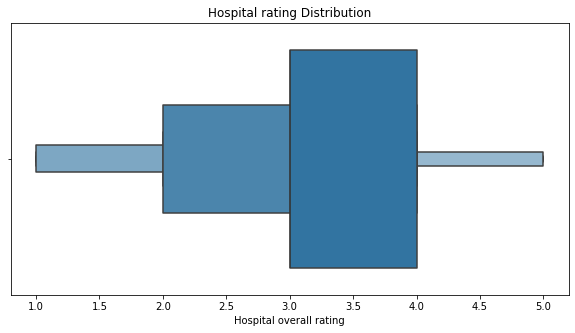

In [143]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=Final_df,x="Hospital overall rating")
plt.title("Hospital rating Distribution")
plt.show()

- Here we can observe that Most of the Hospital having overall rating between 3 to 4 and Hospital having rating 5 are very few 

## 4.2 - Univariate Analysis

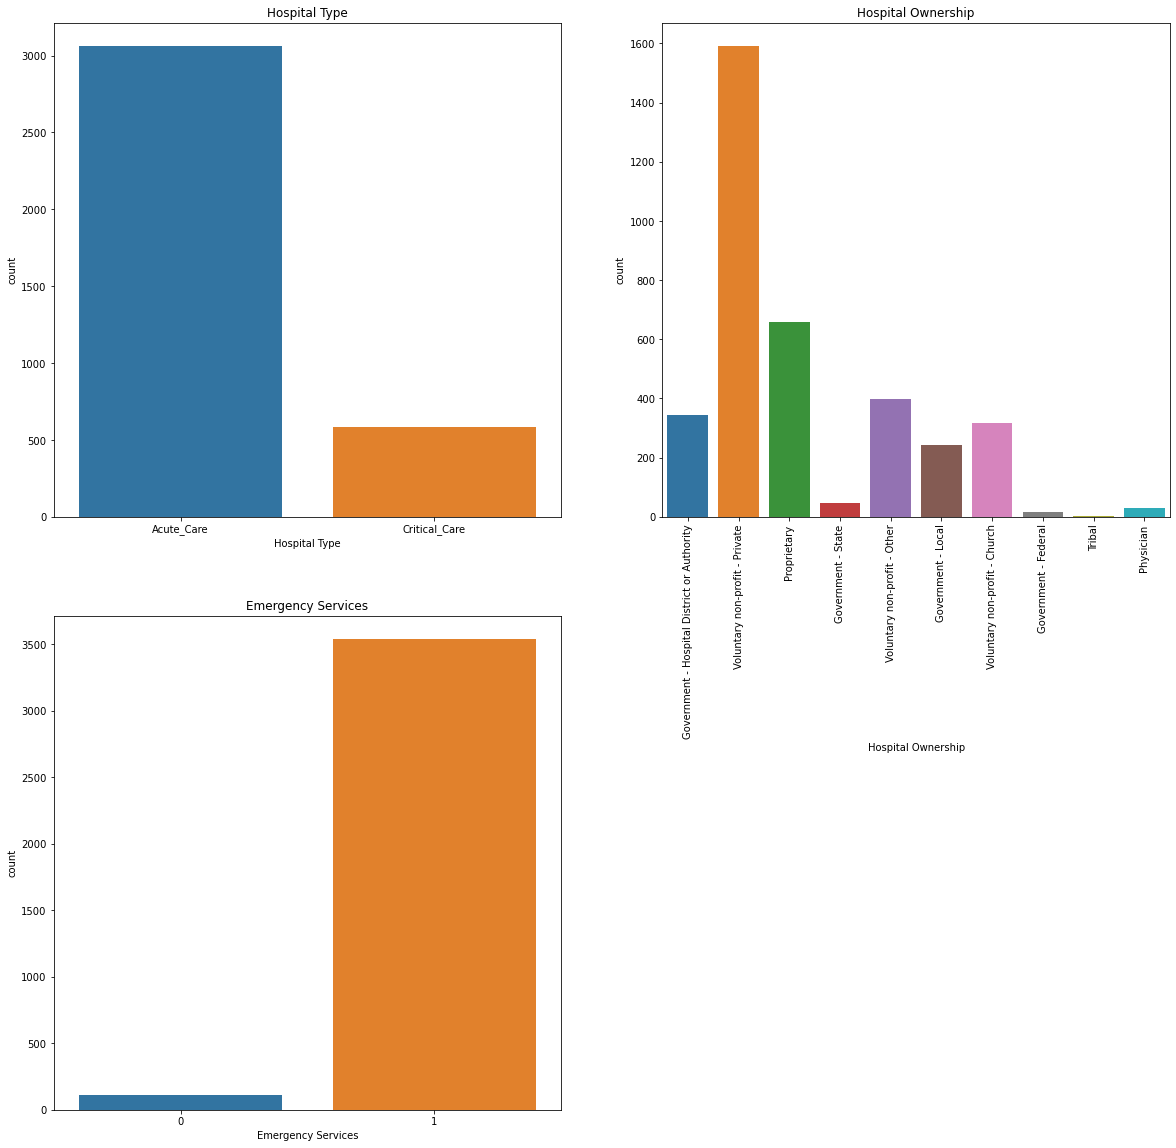

In [144]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(data=Final_df,x="Hospital Type")
plt.title("Hospital Type")


plt.subplot(2,2,2)
sns.countplot(data=Final_df,x="Hospital Ownership")
plt.xticks(rotation=90)
plt.title("Hospital Ownership")


plt.subplot(2,2,3)
sns.countplot(data=Final_df,x="Emergency Services")
plt.title("Emergency Services")
plt.show()


- From above graph we can observe that
     - The Acute Care Hospital Type Count is more than Critical Care.
     - Most of Hospital have Emergency Services available and most of Hosiptal owns by the Voluntary Non-Profit Private Firms and Voluntary Non-Profit Others Firms 
     - The Hospital owns by government are very less

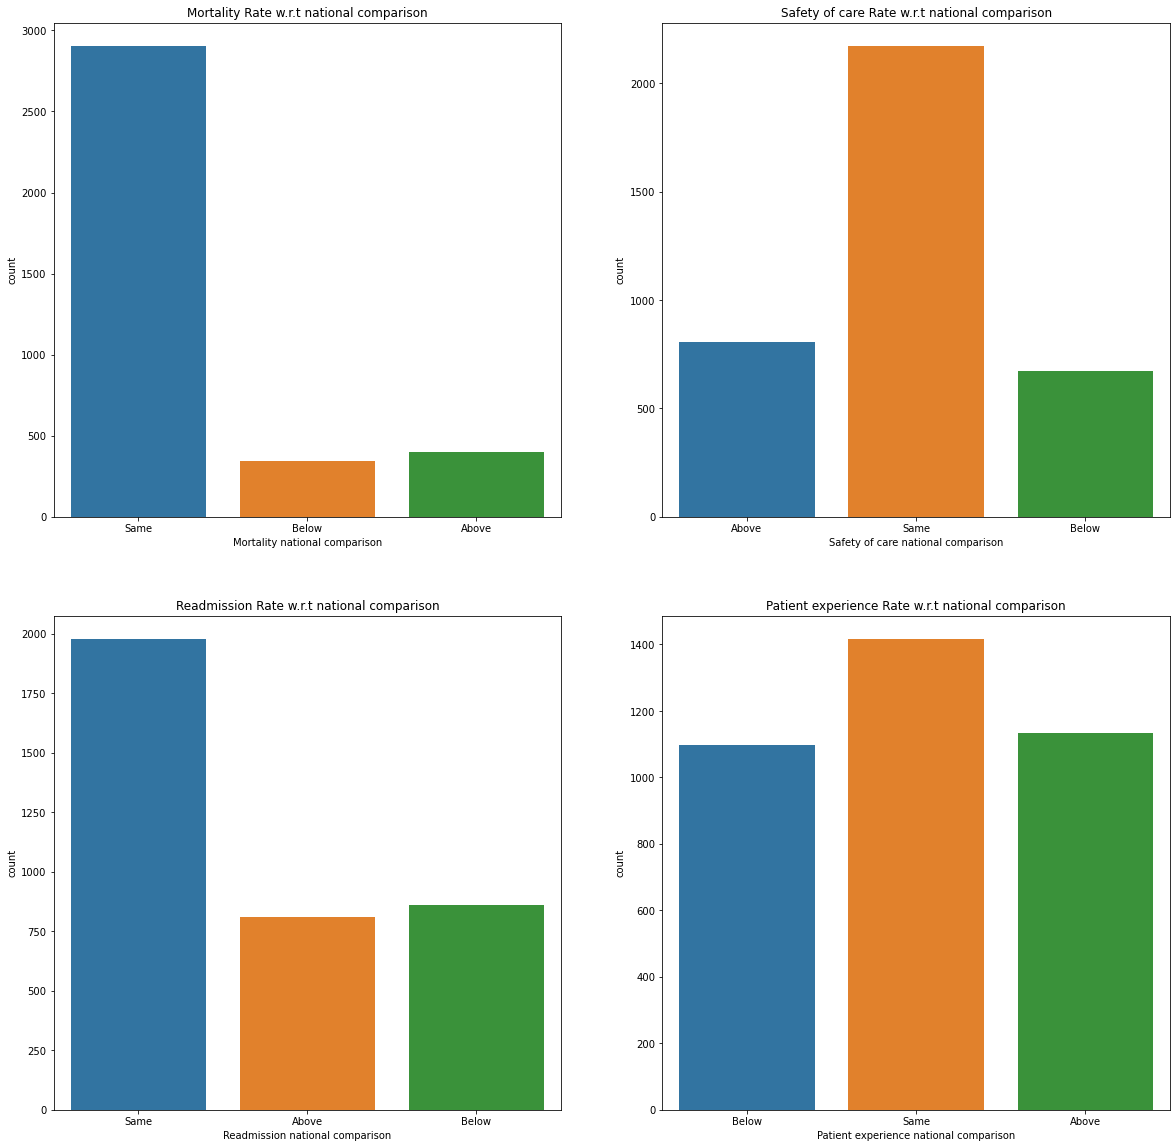

In [145]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(data=Final_df,x="Mortality national comparison")
plt.title("Mortality Rate w.r.t national comparison")

plt.subplot(2,2,2)
sns.countplot(data=Final_df,x="Safety of care national comparison")
plt.title("Safety of care Rate w.r.t national comparison")

plt.subplot(2,2,3)
sns.countplot(data=Final_df,x="Readmission national comparison")
plt.title("Readmission Rate w.r.t national comparison")

plt.subplot(2,2,4)
sns.countplot(data=Final_df,x="Patient experience national comparison")
plt.title("Patient experience Rate w.r.t national comparison")
plt.show()

- From above graph we can conclude that all hospital has same Mortality,Safety of care, Readmission, Patient Experience rate when compare to National Rate.

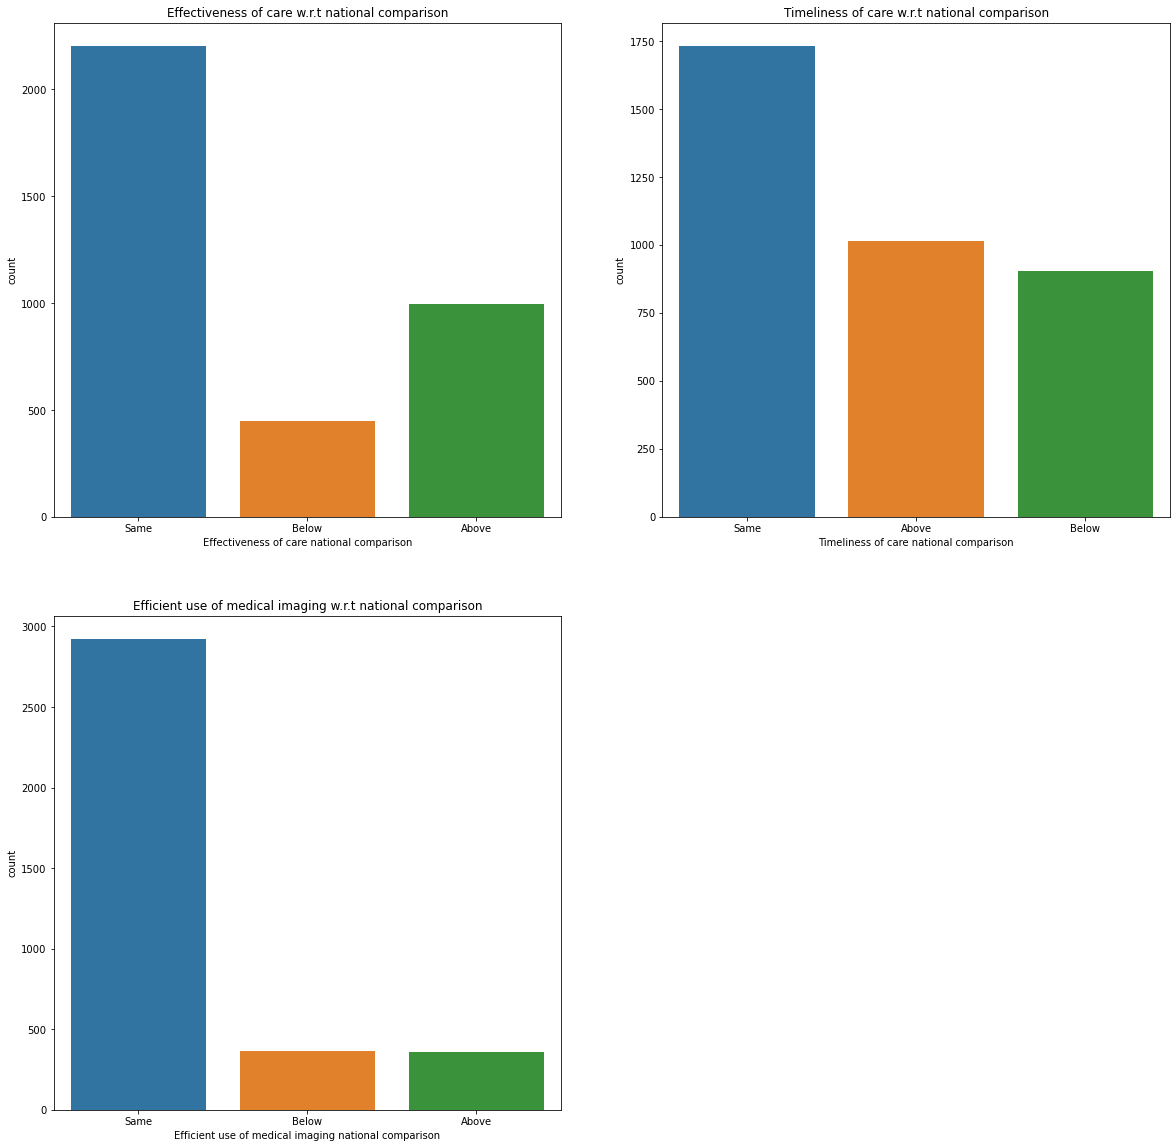

In [146]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.countplot(data=Final_df,x="Effectiveness of care national comparison")
plt.title("Effectiveness of care w.r.t national comparison")

plt.subplot(2,2,2)
sns.countplot(data=Final_df,x="Timeliness of care national comparison")
plt.title("Timeliness of care w.r.t national comparison")

plt.subplot(2,2,3)
sns.countplot(data=Final_df,x="Efficient use of medical imaging national comparison")
plt.title("Efficient use of medical imaging w.r.t national comparison")
plt.show()

- Here also we can observe that the Efficiveness measure , Timeliness Measure and Medical Efficiency Measure are all Same when compare to National Rate

## 4.3-  Bivariate Analysis

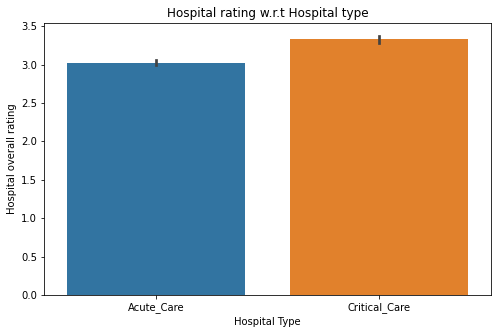

In [147]:
plt.figure(figsize=(8,5))
sns.barplot(data=Final_df,x="Hospital Type",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Hospital type")
plt.show()

- Here we can conclude that the Critical Care type Hospital have more rating as compare to Acute care type Hospital

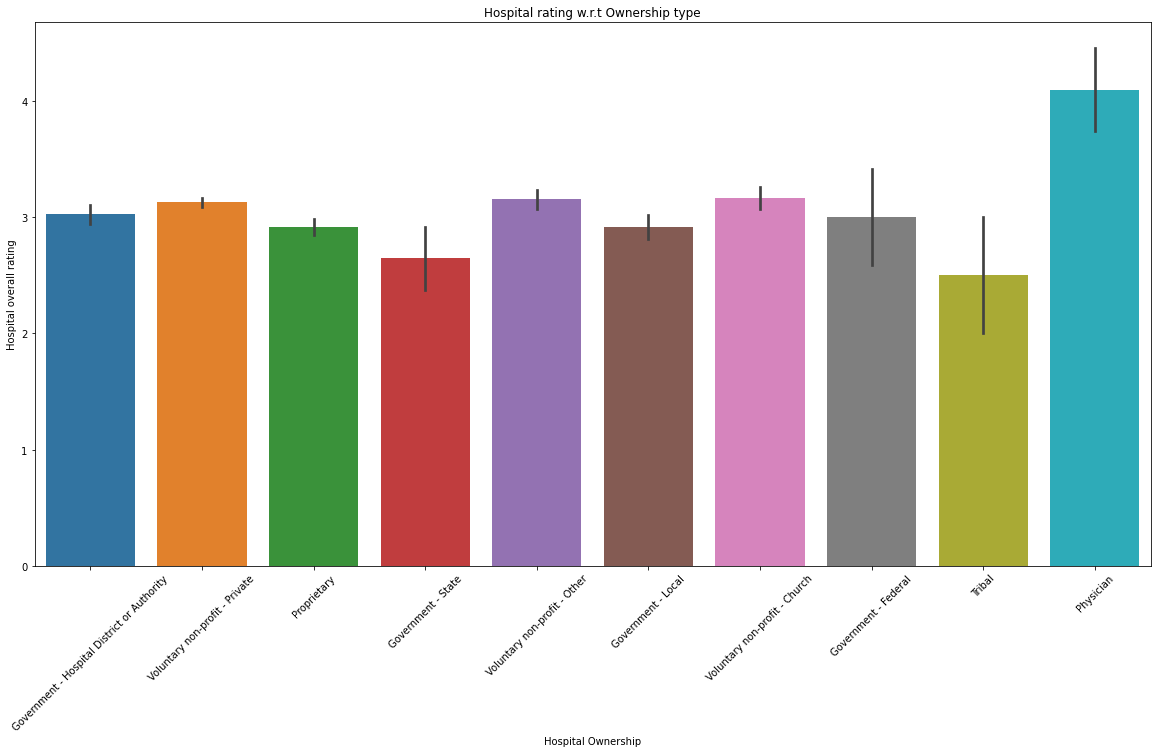

In [148]:
plt.figure(figsize=(20,10))
sns.barplot(data=Final_df,x="Hospital Ownership",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Ownership type")
plt.xticks(rotation=45)
plt.show()

- Here we can conlude that the Hospital owns by Physician are the best with rating of 4 and Goverment owns Hospital have rating 3

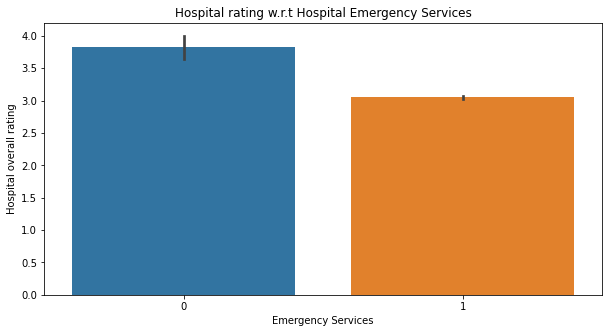

In [149]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,x="Emergency Services",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Hospital Emergency Services")
plt.show()

- Here we can observe that those Hospital have Emergency services available have lower rating as compared to those who don't have Emergency services

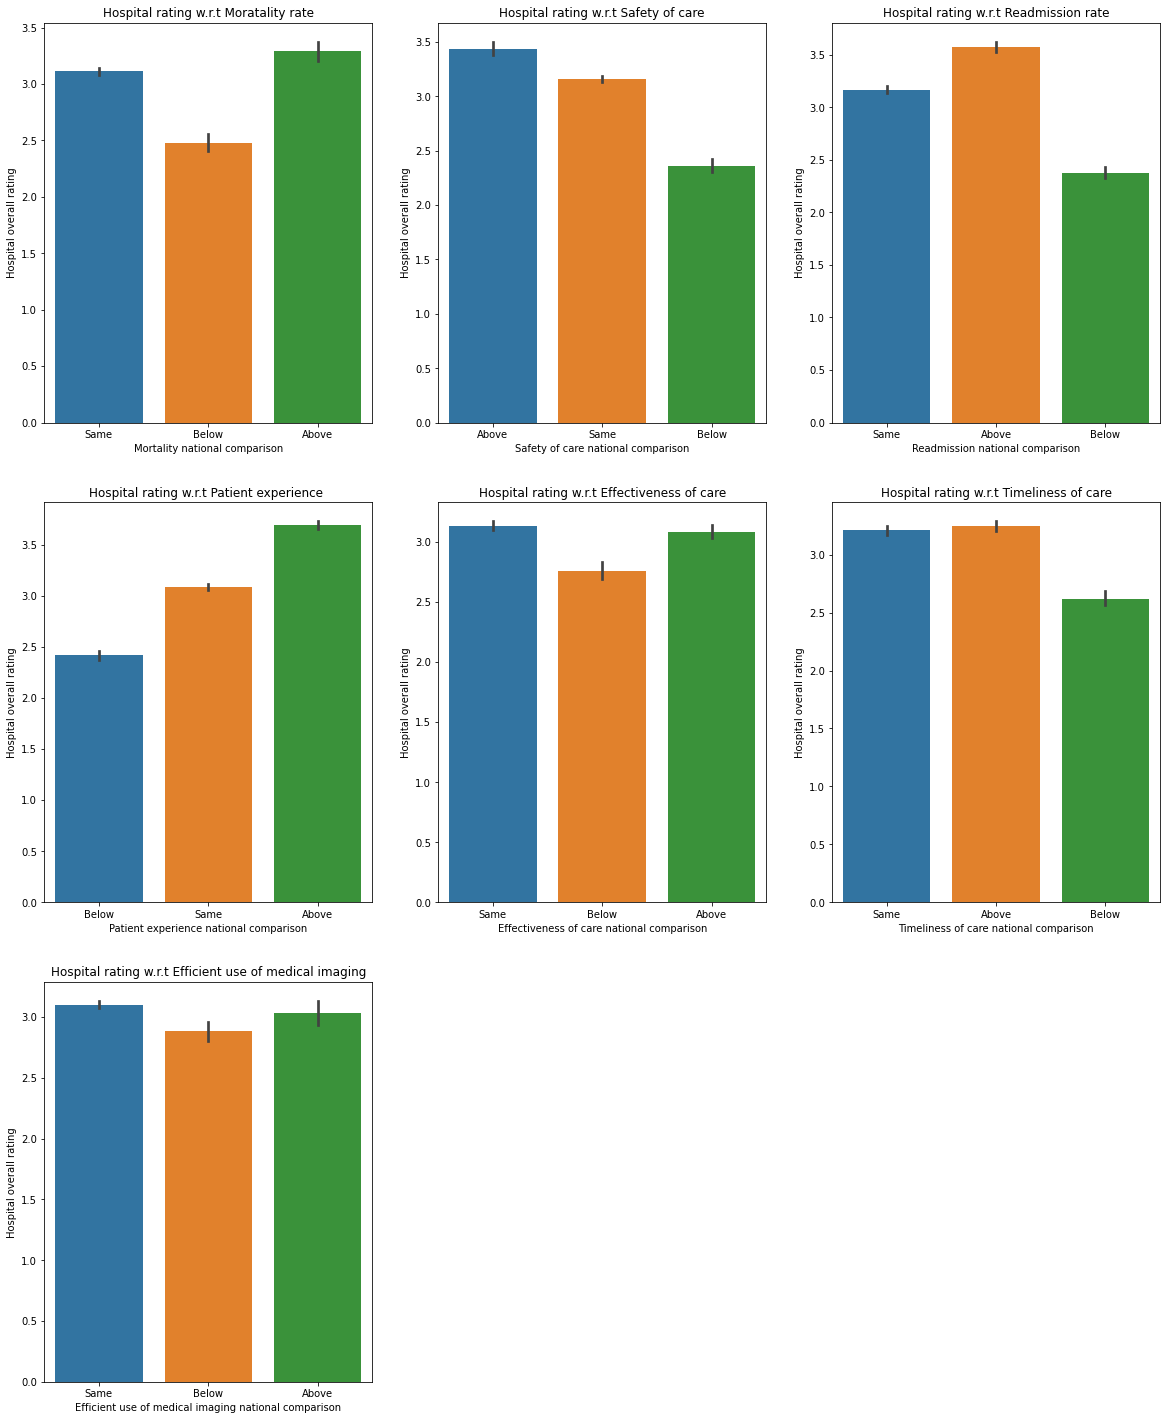

In [150]:
plt.figure(figsize=(20,25))

plt.subplot(3,3,1)
sns.barplot(data=Final_df,x="Mortality national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Moratality rate")

plt.subplot(3,3,2)
sns.barplot(data=Final_df,x="Safety of care national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Safety of care")

plt.subplot(3,3,3)
sns.barplot(data=Final_df,x="Readmission national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Readmission rate")

plt.subplot(3,3,4)
sns.barplot(data=Final_df,x="Patient experience national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Patient experience ")

plt.subplot(3,3,5)
sns.barplot(data=Final_df,x="Effectiveness of care national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Effectiveness of care")

plt.subplot(3,3,6)
sns.barplot(data=Final_df,x="Timeliness of care national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Timeliness of care")

plt.subplot(3,3,7)
sns.barplot(data=Final_df,x="Efficient use of medical imaging national comparison",y="Hospital overall rating")
plt.title("Hospital rating w.r.t Efficient use of medical imaging")
plt.show()

- Here we can observe that 
         - The Hospital having Mortality rate , Readmission Rate, Safety of care rate , Patient Experience above than national averge those hospital have rating of 3.5
         - The Hospital having Effectiveness rate , Timeliness of care, Medical Imaging rate above or same as the national averge those hospital have rating of 3.0 to 3.2

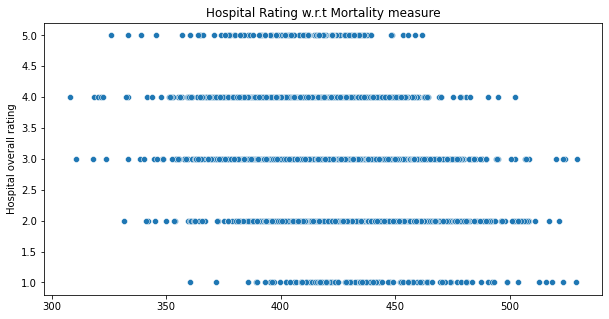

In [151]:
# Now Plotting graph Hospital rating vs All Measure
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Mortality_30_AMI"]+Final_df["Mortality_30_CABG"]+Final_df["Mortality_30_COPD"]+
               Final_df["Moratlity_30_HF"]+Final_df["Mortality_30_PN"]+Final_df["Mortality_30_STK"]+Final_df["Mortality_PSI_4_SURG_COMP"])
               ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Mortality measure")
plt.show()

- Here we can observe that the Mortality rate is increasing as the Hospital Overall rating is decreasing.

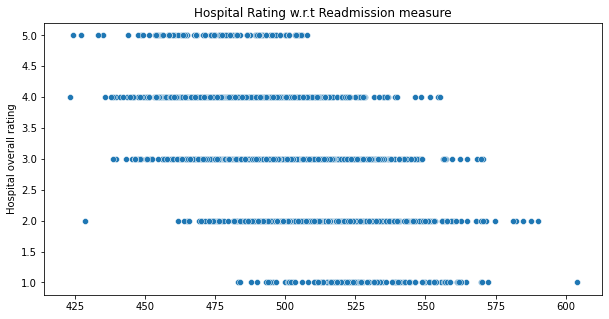

In [152]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Readmission_30_AMI"]+Final_df["Readmission_30_CABG"]+Final_df["Readmission_30_COPD"]+
               Final_df["Readmission_30_HF"]+Final_df["Readmission_30_PN"]+Final_df["Readmission_30_STK"]+Final_df["Readmission_30_HIP_KNEE"])
               ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Readmission measure")
plt.show()

- Here we can observe that the Readmission rate is less in Hospital having rating of 5 ,and the rate is increasing as the rating is decreasing.

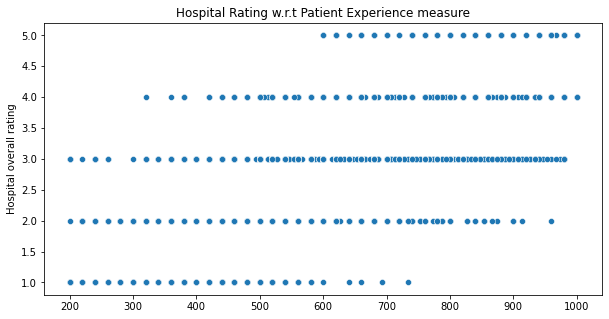

In [153]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Hospital_Cleaniness_Star_rating"]+Final_df["Hospital_Nurse_commnunication_rating"]
                                 +Final_df["Hospital_Docter_Communication_rating"]+Final_df["Hospital_Staff_responsiveness_rating"]
                                 +Final_df["Hospital_Pain_management_rating"]+Final_df["Hospital_medicine_communication_rating"]
                                 +Final_df["Hospital_Discharge_Information_rating"]+Final_df["Hospital_care_transition_rating"]
                                 +Final_df["Hospital_Quietness_rating"]+Final_df["Hospital_recommanding_rating"])
               ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Patient Experience measure")
plt.show()

- Here we can observe that 
    - The Hospital having rating 4 and 5  have very good patient experience.
    - The Hospital having rating 2 and 3 have a patient experience varying from poor to good.
    - The Hospital having rating 1 have vert baad patient experience

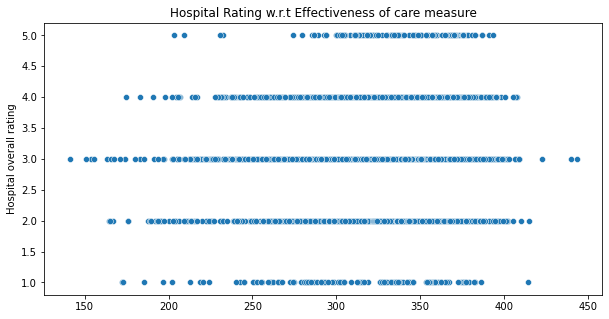

In [154]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Effectiveness_of_care_IMM_2"]+Final_df["Effectiveness_of_care_OP_22"]
                                 +Final_df["Effectiveness_of_care_OP_23"]+Final_df["Effectiveness_of_care_OP_29"]
                                 +Final_df["Effectiveness_of_care_OP_30"]+Final_df["Effectiveness_of_care_PC_01"]
                                 +Final_df["Effectiveness_of_care_VTE_6"])
                            ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Effectiveness of care measure")
plt.show()

- Here we can conclude that the Effectievness rating is vary over wide range ineffective of Hospital rating,

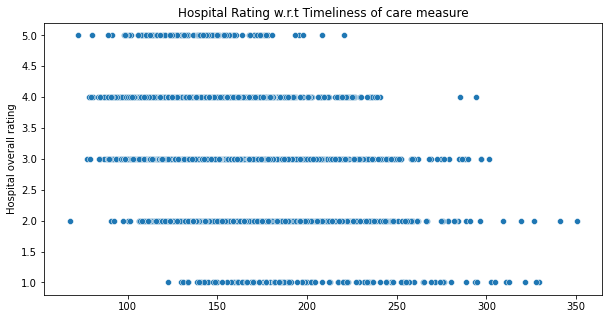

In [155]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Timeliness_of_care_ED_1b"]+Final_df["Timeliness_of_care_OP_3b"]
                                 +Final_df["Timeliness_of_care_OP_18b"]+Final_df["Timeliness_of_care_OP_20"]
                                 +Final_df["Timeliness_of_care_OP_21"]+Final_df["Timeliness_of_care_OP_5"])
                            ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Timeliness of care measure")
plt.show()

- Here we can observe the Timeliness Of care is less for high rating hospital and is increasing as rating decreasing

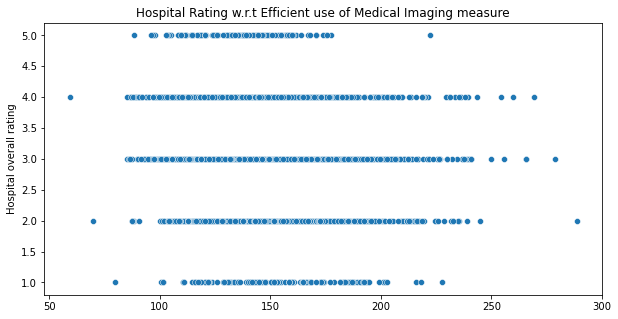

In [156]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Medical_Imaging_OP_10"]+Final_df["Medical_Imaging_OP_11"]
                                 +Final_df["Medical_Imaging_OP_13"]+Final_df["Medical_Imaging_OP_14"]
                                 +Final_df["Medical_Imaging_OP_8"]+Final_df["Medical_Imaging_OP_9"])
                            ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Efficient use of Medical Imaging measure")
plt.show()

- Here we can observe that the efficient use of medical iamging rate is more in Hospital having rating 3 and 4 ,

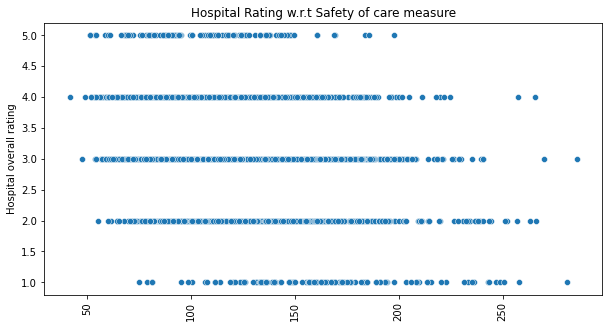

In [157]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=Final_df,x=(Final_df["Safety_of_care_HAI_1_SIR"]+Final_df["Safety_of_care_HAI_2_SIR"]+Final_df["Safety_of_care_HAI_3_SIR"]+Final_df["Safety_of_care_HAI_4_SIR"]
                                 +Final_df["Safety_of_care_HAI_5_SIR"]+Final_df["Safety_of_care_HAI_6_SIR"]+Final_df["Safety_of_care_PSI_90_SAFETY"])
                            ,y="Hospital overall rating")
plt.title("Hospital Rating w.r.t Safety of care measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that the Safety of Care measure is increasing as the rating is  rating is decreasing

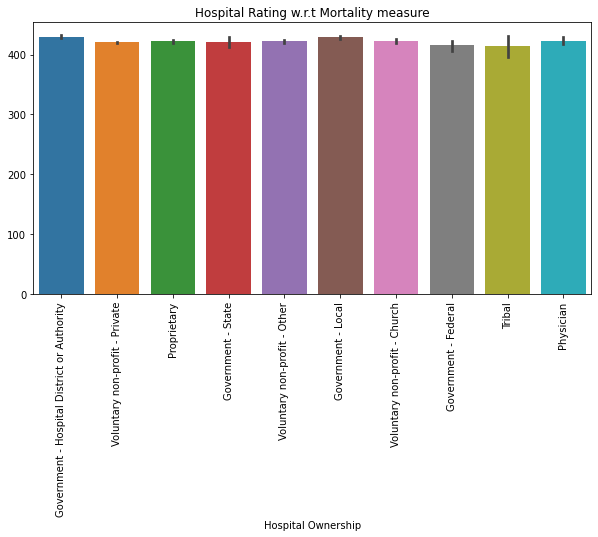

In [158]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Mortality_30_AMI"]+Final_df["Mortality_30_CABG"]+Final_df["Mortality_30_COPD"]+
               Final_df["Moratlity_30_HF"]+Final_df["Mortality_30_PN"]+Final_df["Mortality_30_STK"]+Final_df["Mortality_PSI_4_SURG_COMP"])
               ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Mortality measure")
plt.xticks(rotation=90)
plt.show()

- So here we can observe that all the Hospital have almost similar Mortality rate despite from these Goverment type hospital have little bit less Mortality less than others.

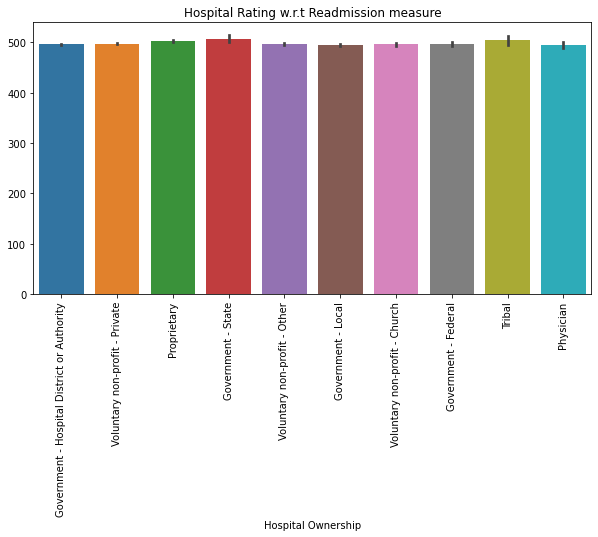

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Readmission_30_AMI"]+Final_df["Readmission_30_CABG"]+Final_df["Readmission_30_COPD"]+
               Final_df["Readmission_30_HF"]+Final_df["Readmission_30_PN"]+Final_df["Readmission_30_STK"]+Final_df["Readmission_30_HIP_KNEE"])
               ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Readmission measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that the almost all Hospital have same Readmission rate only Tribal and Goverment type Hospital have little bit more Readmission rate.

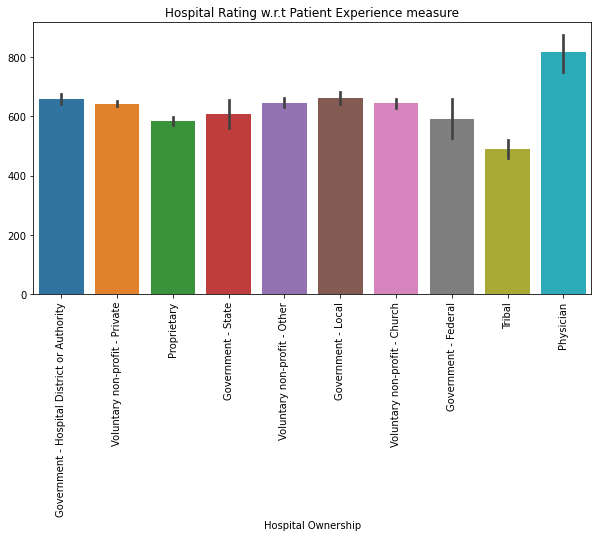

In [160]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Hospital_Cleaniness_Star_rating"]+Final_df["Hospital_Nurse_commnunication_rating"]
                                 +Final_df["Hospital_Docter_Communication_rating"]+Final_df["Hospital_Staff_responsiveness_rating"]
                                 +Final_df["Hospital_Pain_management_rating"]+Final_df["Hospital_medicine_communication_rating"]
                                 +Final_df["Hospital_Discharge_Information_rating"]+Final_df["Hospital_care_transition_rating"]
                                 +Final_df["Hospital_Quietness_rating"]+Final_df["Hospital_recommanding_rating"])
               ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Patient Experience measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that the Hospital owns by Physician have Very good Patient experience and Tribal Hospital have very less rating.

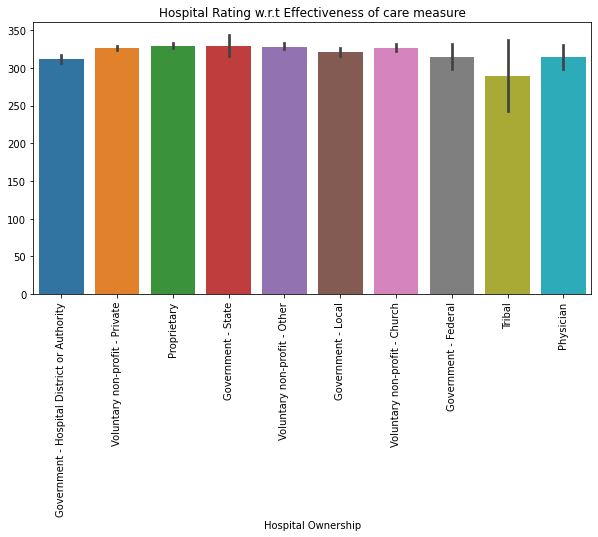

In [161]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Effectiveness_of_care_IMM_2"]+Final_df["Effectiveness_of_care_OP_22"]
                                 +Final_df["Effectiveness_of_care_OP_23"]+Final_df["Effectiveness_of_care_OP_29"]
                                 +Final_df["Effectiveness_of_care_OP_30"]+Final_df["Effectiveness_of_care_PC_01"]
                                 +Final_df["Effectiveness_of_care_VTE_6"])
                            ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Effectiveness of care measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that only Tribal hospital have very less Effectiveness rating and rest of all Hospital have almost same rating

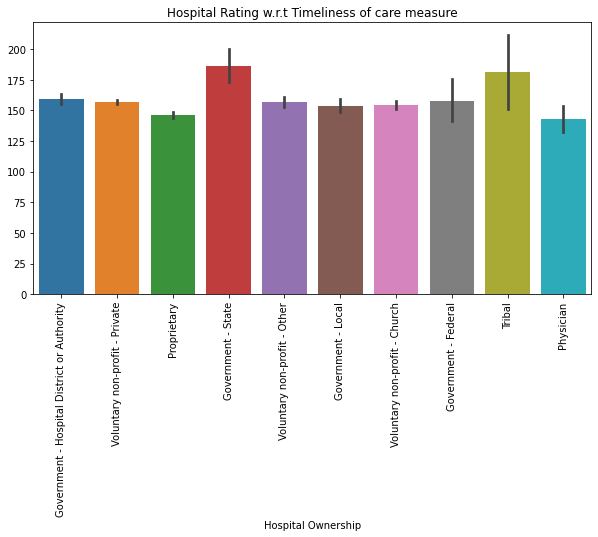

In [162]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Timeliness_of_care_ED_1b"]+Final_df["Timeliness_of_care_OP_3b"]
                                 +Final_df["Timeliness_of_care_OP_18b"]+Final_df["Timeliness_of_care_OP_20"]
                                 +Final_df["Timeliness_of_care_OP_21"]+Final_df["Timeliness_of_care_OP_5"])
                            ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Timeliness of care measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that only Tribal and Goverment hospital have high Timeliness of Care score than all other type of hospital

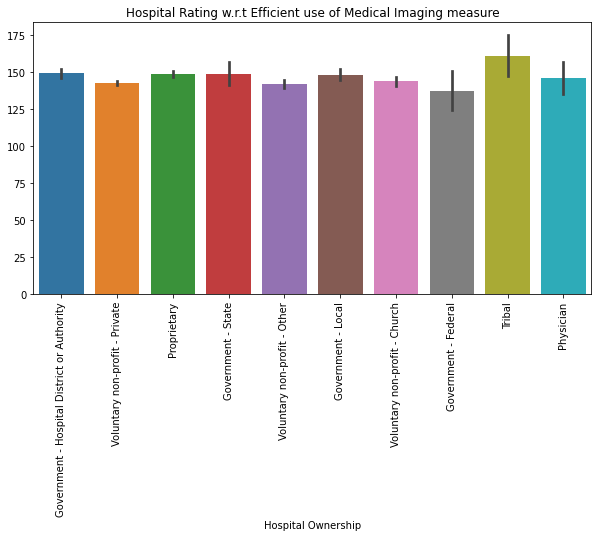

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Medical_Imaging_OP_10"]+Final_df["Medical_Imaging_OP_11"]
                                 +Final_df["Medical_Imaging_OP_13"]+Final_df["Medical_Imaging_OP_14"]
                                 +Final_df["Medical_Imaging_OP_8"]+Final_df["Medical_Imaging_OP_9"])
                            ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Efficient use of Medical Imaging measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that the Tribal Hospital have high rating on Efficient use of Medical Imaging followed by Physician and Goverment Hospital

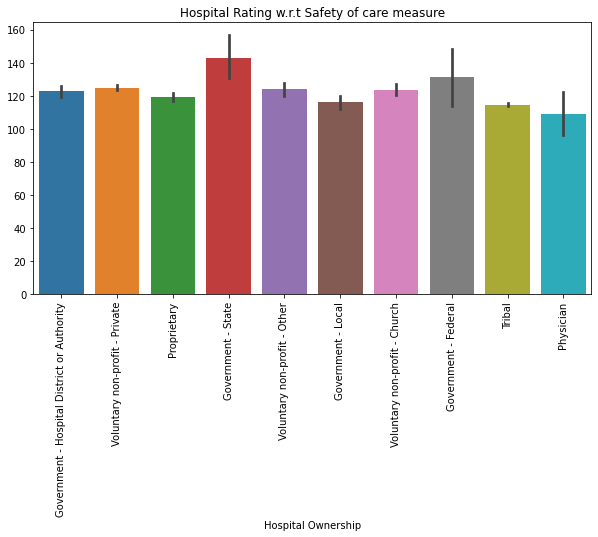

In [164]:
plt.figure(figsize=(10,5))
sns.barplot(data=Final_df,y=(Final_df["Safety_of_care_HAI_1_SIR"]+Final_df["Safety_of_care_HAI_2_SIR"]+Final_df["Safety_of_care_HAI_3_SIR"]+Final_df["Safety_of_care_HAI_4_SIR"]
                                 +Final_df["Safety_of_care_HAI_5_SIR"]+Final_df["Safety_of_care_HAI_6_SIR"]+Final_df["Safety_of_care_PSI_90_SAFETY"])
                            ,x="Hospital Ownership")
plt.title("Hospital Rating w.r.t Safety of care measure")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that Goverment Hospital very very high Safety of Care rating.

## 4.4 - Multivariate Analysis

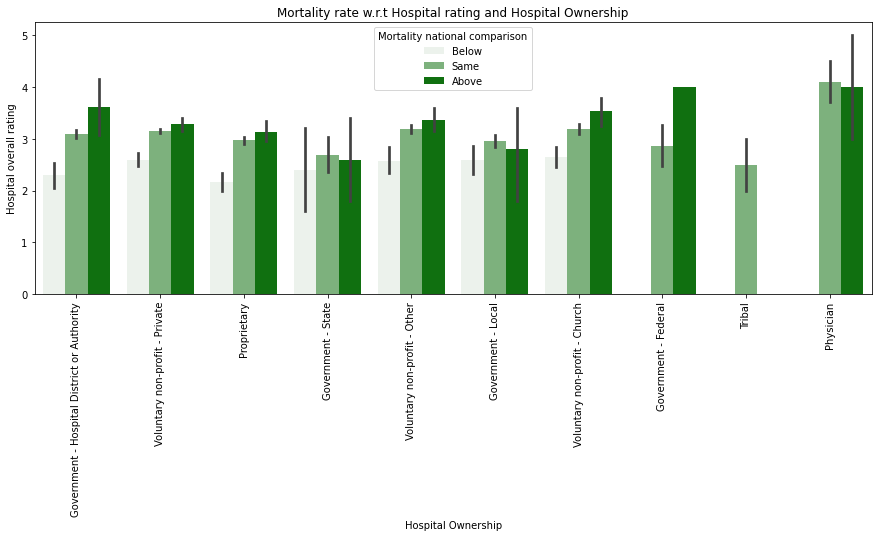

In [165]:
plt.figure(figsize=(15,5))
sns.barplot(data=Final_df,y="Hospital overall rating",
            x="Hospital Ownership",
            hue="Mortality national comparison",color="Green",
            hue_order=['Below', 'Same', 'Above'])
plt.title("Mortality rate w.r.t Hospital rating and Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that only Goverment and Physician Hospital have Mortality rate less than National averge rest all hospital have Mortality rate more than Nationl Avg.

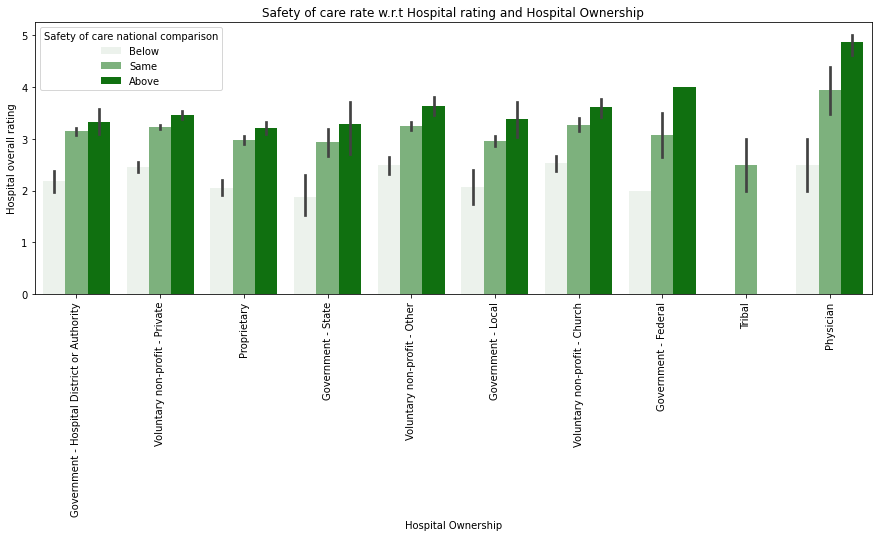

In [166]:
plt.figure(figsize=(15,5))
sns.barplot(data=Final_df,y="Hospital overall rating",
            x="Hospital Ownership",
            hue="Safety of care national comparison",color="Green",
            hue_order=['Below', 'Same', 'Above'])
plt.title("Safety of care rate w.r.t Hospital rating and Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that all hospital have Safety of care score above the National Avg.

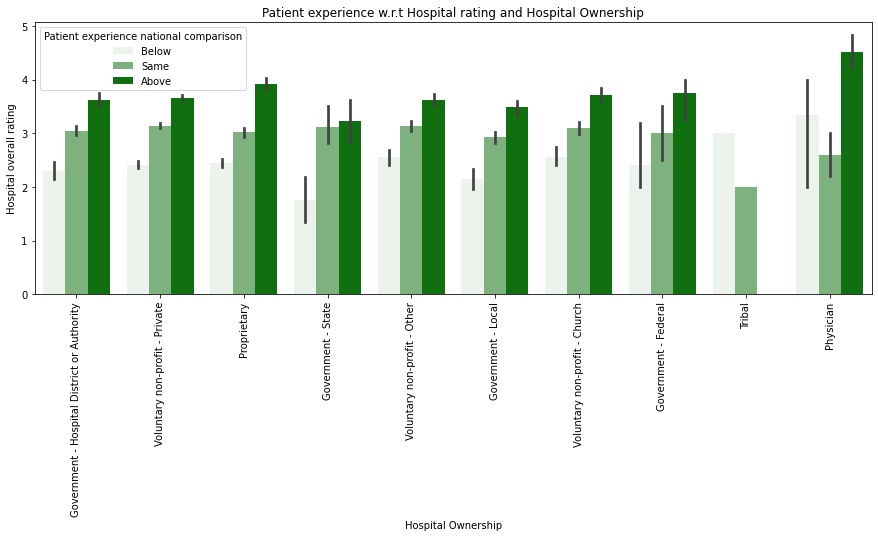

In [167]:
plt.figure(figsize=(15,5))
sns.barplot(data=Final_df,y="Hospital overall rating",
            x="Hospital Ownership",
            hue="Patient experience national comparison",color="Green",
            hue_order=['Below', 'Same', 'Above'])
plt.title("Patient experience w.r.t Hospital rating and Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that all hospital have Patient Experience rating above the National Avg.

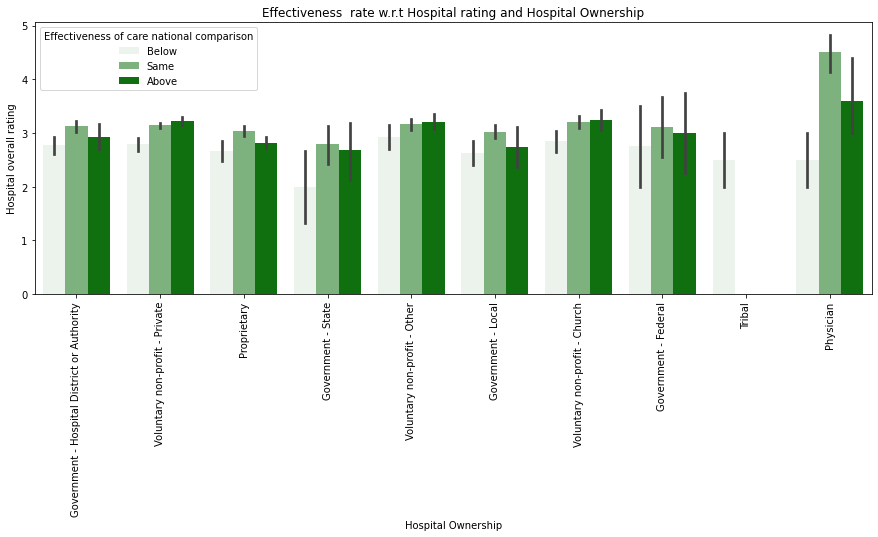

In [168]:
plt.figure(figsize=(15,5))
sns.barplot(data=Final_df,y="Hospital overall rating",
            x="Hospital Ownership",
            hue="Effectiveness of care national comparison",color="Green",
            hue_order=['Below', 'Same', 'Above'])
plt.title("Effectiveness  rate w.r.t Hospital rating and Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that most of the hospital have Effectiveness rating same as National Avg only some Voluntary Type Hospital have rating above than Nationl Avg.

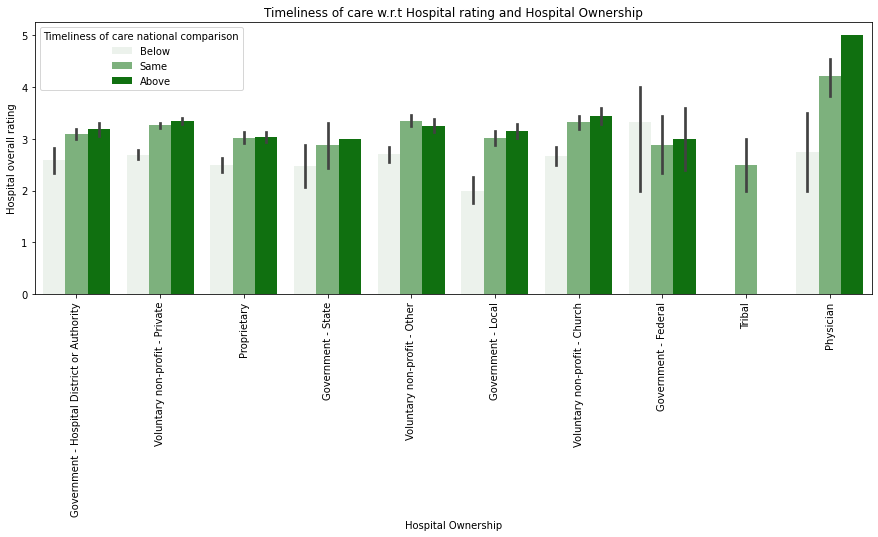

In [169]:
plt.figure(figsize=(15,5))
sns.barplot(data=Final_df,y="Hospital overall rating",
            x="Hospital Ownership",
            hue="Timeliness of care national comparison",color="Green",
            hue_order=['Below', 'Same', 'Above'])
plt.title("Timeliness of care w.r.t Hospital rating and Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that almost all Hospital have Timeliness of care rating either Same or above than National Avg but onpy Goverment Federal Type Hospital have Timeliness of care rating below than National Avg.

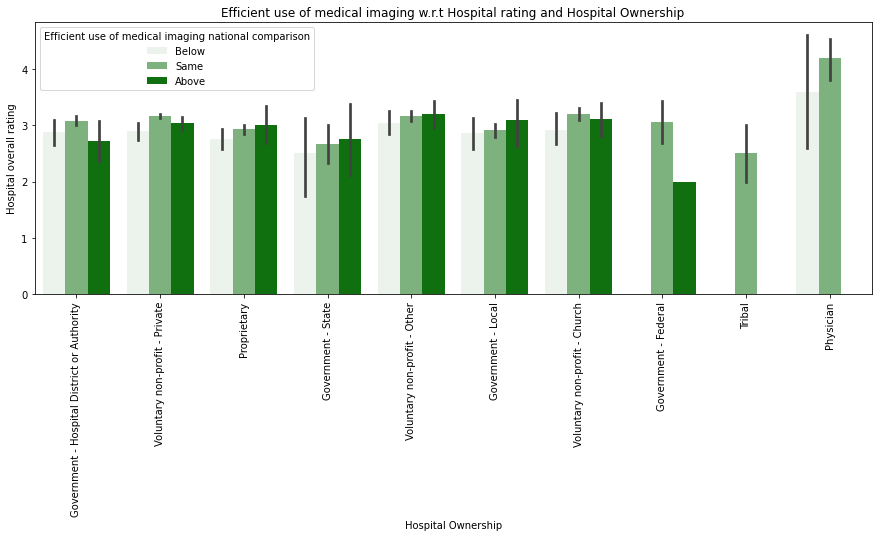

In [170]:
plt.figure(figsize=(15,5))
sns.barplot(data=Final_df,y="Hospital overall rating",
            x="Hospital Ownership",
            hue="Efficient use of medical imaging national comparison",color="Green",
            hue_order=['Below', 'Same', 'Above'])
plt.title("Efficient use of medical imaging w.r.t Hospital rating and Hospital Ownership")
plt.xticks(rotation=90)
plt.show()

- Here we can observe that the all the Hospital have Medical Imaging Efficiency score is above the National Avg except Physician and Tribal type Hospital.

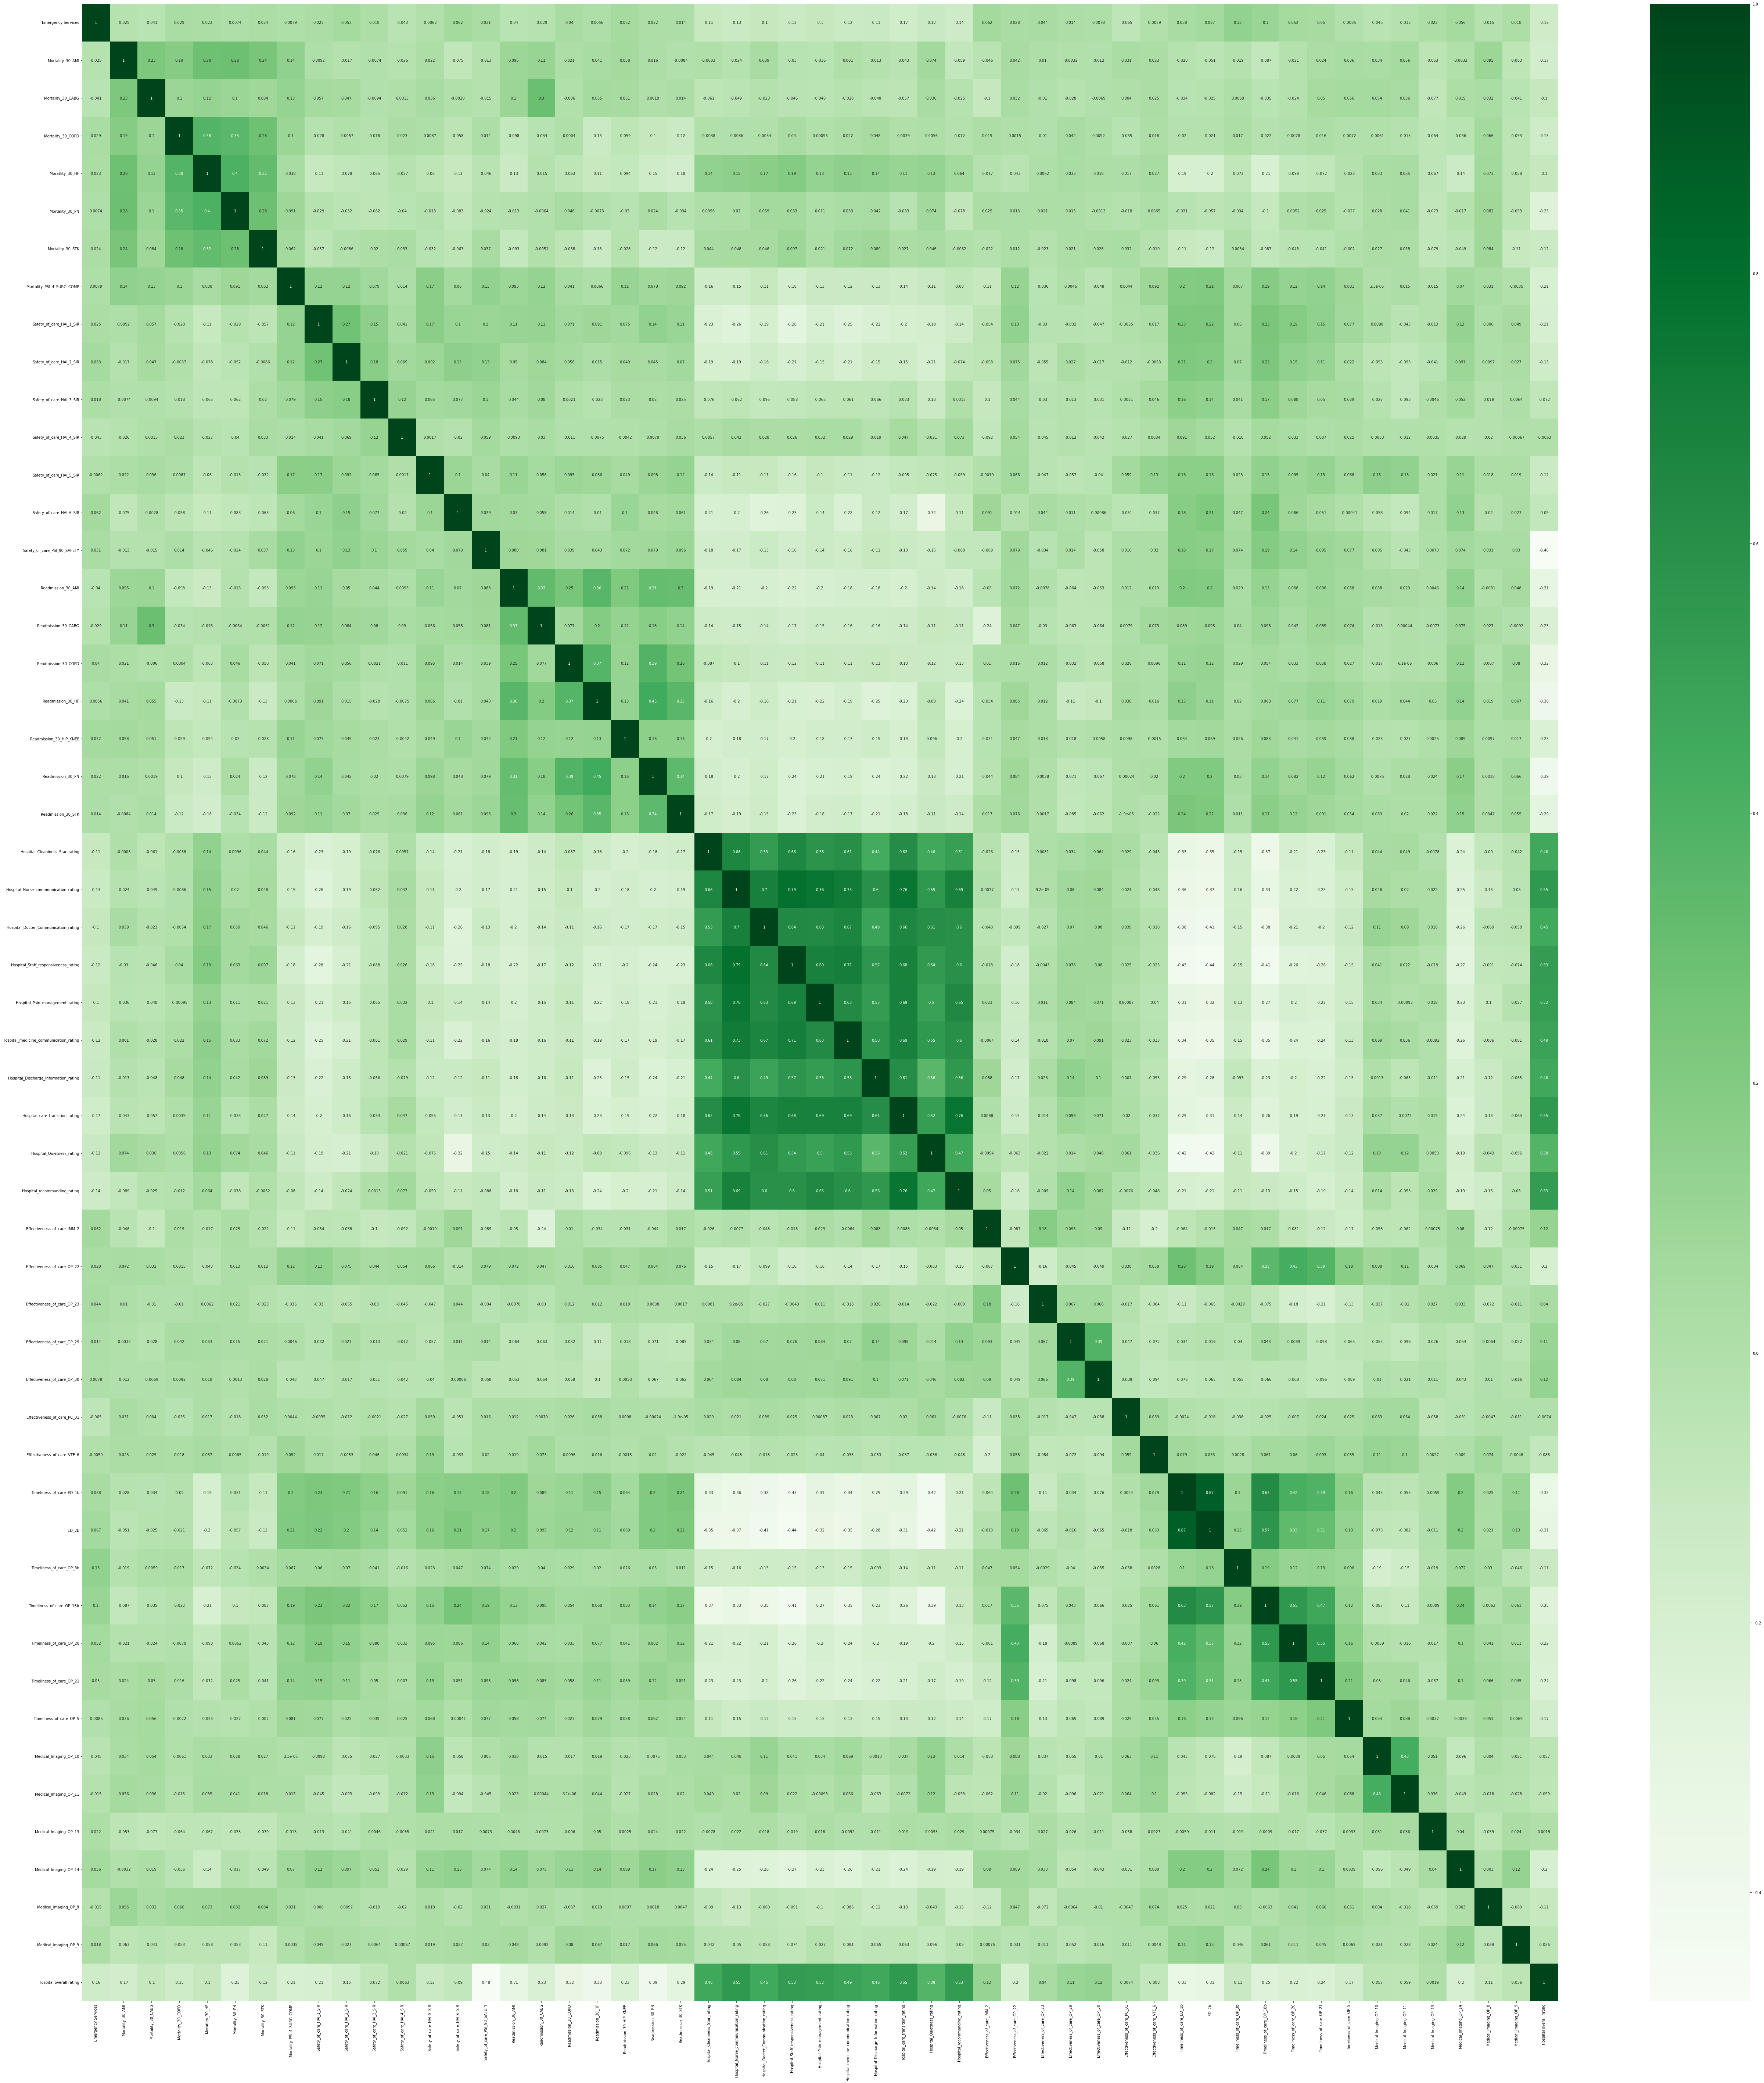

In [171]:
plt.figure(figsize=(90,100))
sns.heatmap(Final_df.corr(),cmap="Greens", annot=True)
plt.show()

- Here we can observe that some Variable are highly correlated with some other variable.

# STEP 5 - DATA PREPARATION

**Making the data read for modeling**

In [172]:
# Checking the data once
Final_df.head(2)

,Hospital Type,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,Acute_Care,Government - Hospital District or Authority,1,Same,Above,Same,Below,Same,Same,Same,62.5,50.60,65.96,69.27,57.84,66.09,79.31,33.53,28.24,35.85,0.00,6.01,21.04,31.78,80.10,75.88,80.84,68.37,65.38,75.71,71.75,40.0,60.0,60.0,40.0,60.0,60.0,60.0,60.0,80.0,80.0,97.0,11.76,71.67,82.67,82.0,0.00,0.00,25.97,10.30,25.42,45.79,47.79,69.72,11.33,7.75,1.60,52.21,17.14,60.09,10.73,3.0
10005,Acute_Care,Government - Hospital District or Authority,1,Below,Same,Above,Same,Same,Above,Below,80.0,40.56,53.90,86.59,77.61,66.52,84.39,20.46,9.02,7.40,15.24,19.78,10.83,39.72,81.07,72.86,68.97,69.97,73.08,66.40,75.71,40.0,60.0,80.0,60.0,60.0,60.0,80.0,40.0,80.0,60.0,99.0,5.88,86.00,92.00,92.0,1.27,3.19,23.46,10.76,24.16,27.34,19.85,42.25,24.00,16.10,18.12,38.97,28.57,67.51,7.93,3.0


In [173]:
# Checking the info
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 10001 to 650001
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Hospital Type                                         3648 non-null   object 
 1   Hospital Ownership                                    3648 non-null   object 
 2   Emergency Services                                    3648 non-null   int64  
 3   Mortality national comparison                         3648 non-null   object 
 4   Safety of care national comparison                    3648 non-null   object 
 5   Readmission national comparison                       3648 non-null   object 
 6   Patient experience national comparison                3648 non-null   object 
 7   Effectiveness of care national comparison             3648 non-null   object 
 8   Timeliness of care national comparison              

### 5.1 - Dummy Encoding 

In [174]:
# Creating the list of Categorical Column for Dummy encoding
Categorical_columns.remove("Emergency Services")
Categorical_columns

['Hospital Type',
 'Hospital Ownership',
 'Mortality national comparison',
 'Safety of care national comparison',
 'Readmission national comparison',
 'Patient experience national comparison',
 'Effectiveness of care national comparison',
 'Timeliness of care national comparison',
 'Efficient use of medical imaging national comparison']

In [175]:
# Creating the dummy variable of categorical columns and dropping the first one.
dummy_1=pd.get_dummies(Final_df[Categorical_columns],drop_first=True)
dummy_1.head(2)

,Hospital Type_Critical_Care,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,Mortality national comparison_Below,Mortality national comparison_Same,Safety of care national comparison_Below,Safety of care national comparison_Same,Readmission national comparison_Below,Readmission national comparison_Same,Patient experience national comparison_Below,Patient experience national comparison_Same,Effectiveness of care national comparison_Below,Effectiveness of care national comparison_Same,Timeliness of care national comparison_Below,Timeliness of care national comparison_Same,Efficient use of medical imaging national comparison_Below,Efficient use of medical imaging national comparison_Same
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,
10001,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1
10005,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [176]:
# Concating the dummy_1 dataset with Final_df
Final_df=pd.concat([Final_df,dummy_1],axis=1)

# Dropping the original columns
Final_df.drop(Final_df[Categorical_columns],axis=1,inplace=True)

# Checking the Final_df
Final_df.head(2)

,Emergency Services,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating,Hospital Type_Critical_Care,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,Mortality national comparison_Below,Mortality national comparison_Same,Safety of care national comparison_Below,Safety of care national comparison_Same,Readmission national comparison_Below,Readmission national comparison_Same,Patient experience national comparison_Below,Patient experience national comparison_Same,Effectiveness of care national comparison_Below,Effectiveness of care national comparison_Same,Timeliness of care national comparison_Below,Timeliness of care national comparison_Same,Efficient use of medical imaging national comparison_Below,Efficient use of medical imaging national comparison_Same
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,1,62.5,50.60,65.96,69.27,57.84,66.09,79.31,33.53,28.24,35.85,0.00,6.01,21.04,31.78,80.10,75.88,80.84,68.37,65.38,75.71,71.75,40.0,60.0,60.0,40.0,60.0,60.0,60.0,60.0,80.0,80.0,97.0,11.76,71.67,82.67,82.0,0.00,0.00,25.97,10.30,25.42,45.79,47.79,69.72,11.33,7.75,1.60,52.21,17.14,60.09,10.73,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1
10005,1,80.0,40.56,53.90,86.59,77.61,66.52,84.39,20.46,9.02,7.40,15.24,19.78,10.83,39.72,81.07,72.86,68.97,69.97,73.08,66.40,75.71,40.0,60.0,80.0,60.0,60.0,60.0,80.0,40.0,80.0,60.0,99.0,5.88,86.00,92.00,92.0,1.27,3.19,23.46,10.76,24.16,27.34,19.85,42.25,24.00,16.10,18.12,38.97,28.57,67.51,7.93,3.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [177]:
# Checking the Shape
Final_df.shape

(3648, 77)

In [178]:
# Checking for outlier in data and Scaling of data
Final_df.describe()

,Emergency Services,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating,Hospital Type_Critical_Care,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,Mortality national comparison_Below,Mortality national comparison_Same,Safety of care national comparison_Below,Safety of care national comparison_Same,Readmission national comparison_Below,Readmission national comparison_Same,Patient experience national comparison_Below,Patient experience national comparison_Same,Effectiveness of care national comparison_Below,Effectiveness of care national comparison_Same,Timeliness of care national comparison_Below,Timeliness of care national comparison_Same,Efficient use of medical imaging national comparison_Below,Efficient use of medical imaging national comparison_Same
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.00000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,0.969846,70.428468,38.435669,57.340373,67.94366,61.183564,64.458914,62.515293,8.305422,9.064534,16.388468,16.596946,10.864054,20.678098,41.129548,81.334701,71.456708,76.589013,70.148484,58.490743,69.356834,70.574457,58.188961,71.705014,65.665206,67.344655,63.779241,62.669945,67.898396,54.069794,60.952111,64.078909,93.657963,5.404660,68.015450,72.933627,80.407774,3.043632,1.939082,27.040669,15.301516,21.753695,33.254608,19.167341,37.165625,16.599866,10.831280,5.715899,35.431467,16.139389,62.864635,13.764877,3.073465,0.160910,0.094572,0.066886,0.012610,0.008498,0.180647,0.000548,0.086623,0.108827,0.436129,0.094024,0.795779,0.184485,0.595121,0.235746,0.541941,0.300713,0.388158,0.123081,0.603618,0.247533,0.474507,0.100877,0.800713
st

### 5.2- Data Imbalance

In [179]:
# Checking for Data Imbalance
Final_df["Hospital overall rating"].value_counts()

3.0    1772
4.0     964
2.0     684
1.0     117
5.0     111
Name: Hospital overall rating, dtype: int64

- So we can observe that the data is imbalance state and rating 3 is dominating the other
- So we will do SMOTE analysis for handling the class imbalance issue

### 5.3 - Target Hospital seperation 

In [180]:
Target_Hosp=Final_df[Final_df.index == 140010]
Target_Hosp

,Emergency Services,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating,Hospital Type_Critical_Care,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,Mortality national comparison_Below,Mortality national comparison_Same,Safety of care national comparison_Below,Safety of care national comparison_Same,Readmission national comparison_Below,Readmission national comparison_Same,Patient experience national comparison_Below,Patient experience national comparison_Same,Effectiveness of care national comparison_Below,Effectiveness of care national comparison_Same,Timeliness of care national comparison_Below,Timeliness of care national comparison_Same,Efficient use of medical imaging national comparison_Below,Efficient use of medical imaging national comparison_Same
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
140010,1,56.0,26.51,40.43,53.07,48.51,53.65,39.99,11.5,11.4,22.2,0.0,11.7,25.82,67.76,80.1,78.39,75.48,67.73,47.44,67.21,72.32,60.0,60.0,60.0,60.0,60.0,40.0,60.0,40.0,60.0,80.0,97.0,2.94,53.33,85.0,94.0,0.0,7.45,23.65,11.52,22.14,38.79,36.03,43.66,11.33,7.63,3.55,41.18,15.71,60.25,8.71,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [181]:
# Dropping the Target Hospital from Final_df
Final_df=Final_df[Final_df.index != 140010]

### 5.4 - X and Y split

In [182]:
# Creating a copy of orginal dataset
Final_df_1=Final_df.copy()

# Reseting the index
Final_df_1.reset_index(level=0,inplace=True)

# Splitting in X and y
y=Final_df_1["Hospital overall rating"]
X=Final_df_1.drop("Hospital overall rating",axis=1)

# Scaling the X with MinMax Scaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [183]:
# Checking the X and y
X.head(2)

,Provider ID,Emergency Services,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital Type_Critical_Care,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,Mortality national comparison_Below,Mortality national comparison_Same,Safety of care national comparison_Below,Safety of care national comparison_Same,Readmission national comparison_Below,Readmission national comparison_Same,Patient experience national comparison_Below,Patient experience national comparison_Same,Effectiveness of care national comparison_Below,Effectiveness of care national comparison_Same,Timeliness of care national comparison_Below,Timeliness of care national comparison_Same,Efficient use of medical imaging national comparison_Below,Efficient use of medical imaging national comparison_Same
0,10001,1,62.5,50.60,65.96,69.27,57.84,66.09,79.31,33.53,28.24,35.85,0.00,6.01,21.04,31.78,80.10,75.88,80.84,68.37,65.38,75.71,71.75,40.0,60.0,60.0,40.0,60.0,60.0,60.0,60.0,80.0,80.0,97.0,11.76,71.67,82.67,82.0,0.00,0.00,25.97,10.30,25.42,45.79,47.79,69.72,11.33,7.75,1.60,52.21,17.14,60.09,10.73,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1
1,10005,1,80.0,40.56,53.90,86.59,77.61,66.52,84.39,20.46,9.02,7.40,15.24,19.78,10.83,39.72,81.07,72.86,68.97,69.97,73.08,66.40,75.71,40.0,60.0,80.0,60.0,60.0,60.0,80.0,40.0,80.0,60.0,99.0,5.88,86.00,92.00,92.0,1.27,3.19,23.46,10.76,24.16,27.34,19.85,42.25,24.00,16.10,18.12,38.97,28.57,67.51,7.93,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [184]:
y.head(2)

0    3.0
1    3.0
Name: Hospital overall rating, dtype: float64

# STEP 6 - Model Building

## Model 1 Logistic Regression

In [185]:
# Initializing the logistic Regresiion model
logreg=LogisticRegression(multi_class="ovr")

# Defining the Stratified K-Fold Cross Validation Object 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [186]:
# Now Testing and Evaluating on Strafied K fold 
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logreg.fit(x_train, y_train)

# Now evaluating the dataset
y_test_pred_Model_1=logreg.predict(x_test)

In [187]:
# Now Calculating the metrics
accuracy_model_1=np.round(logreg.score(x_test,y_test)*100,2)
precision_Model_1=np.round(metrics.precision_score(y_test,y_test_pred_Model_1,average="macro")*100,2)

In [188]:
# Now creating a Dataframe to store all 
Scoring=pd.DataFrame(columns=["Model_Name","Accuracy_score","Precision_score"])
Scoring.loc[(len(Scoring))]=["Logistic Regression",accuracy_model_1,precision_Model_1]
Scoring

,Model_Name,Accuracy_score,Precision_score
0,Logistic Regression,71.7,69.15


**Here we will only want Accuracy score and Precision score to evalute our Model so we will focus on that only** 

- Here we have got Accuracy of 71.7% and Precision score of 69.15 % which is ok but we want more accuracy so lets preparing more model to get the best model with high accuracy

## Model 2 - Decision Tree

In [189]:
# Creating a copy of orginal dataset
Final_df_2=Final_df.copy()

# Reseting the index
Final_df_2.reset_index(level=0,inplace=True)

# Splitting in X and y
y=Final_df_2["Hospital overall rating"]
X=Final_df_2.drop("Hospital overall rating",axis=1)

# Scaling the X 
X_scaled=scaler.fit_transform(X)

In [190]:
# Initializing the model
Model_2=DecisionTreeClassifier(max_depth=5,random_state=42,class_weight={3:0.485605,4:0.264327,2:0.187551,1:0.032081,5:0.030436})

In [191]:
# Now Testing and Evaluating on Strafied K fold 
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    Model_2.fit(x_train, y_train)

# Now evaluating the dataset
y_test_pred_Model_2=Model_2.predict(x_test)

In [192]:
# Now Calculating the other metrics as well 
accuracy_model_2=np.round(Model_2.score(x_test,y_test)*100,2)
precision_Model_2=np.round(metrics.precision_score(y_test,y_test_pred_Model_2,average="macro")*100,2)

In [193]:
Scoring.loc[(len(Scoring))]=["Decision Tree",accuracy_model_2,precision_Model_2]
Scoring

,Model_Name,Accuracy_score,Precision_score
0,Logistic Regression,71.70,69.15
1,Decision Tree,59.34,35.64


- With Decision Tree Model we gave got accuracy of 59.34% and Precision Score of 35.64%. which is very bad.
- Now Building another Model

## Model 3 Random Forest

In [194]:
# Creating a copy of orginal dataset
Final_df_3=Final_df.copy()

# Reseting the index
Final_df_3.reset_index(level=0,inplace=True)

# Splitting in X and y
y=Final_df_3["Hospital overall rating"]
X=Final_df_3.drop("Hospital overall rating",axis=1)

# Scaling the X 
X_scaled=scaler.fit_transform(X)

In [195]:
# Initializing the Random forest
Model_3=RandomForestClassifier(n_estimators=50,random_state=42)

In [196]:
# Now Testing and Evaluating on Strafied K fold 
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    Model_3.fit(x_train, y_train)

# Now evaluating the dataset
y_test_pred_Model_3=Model_3.predict(x_test)

In [197]:
# Now Calculating the other metrics as well 
accuracy_model_3=np.round(Model_3.score(x_test,y_test)*100,2)
precision_Model_3=np.round(metrics.precision_score(y_test,y_test_pred_Model_3,average="macro")*100,2)

In [198]:
Scoring.loc[(len(Scoring))]=["Random Forest",accuracy_model_3,precision_Model_3]
Scoring

,Model_Name,Accuracy_score,Precision_score
0,Logistic Regression,71.70,69.15
1,Decision Tree,59.34,35.64
2,Random Forest,74.73,85.55


- So here we have got Accuracy score of 74.73% and Precision Score of 85.55% which is highest from all model

- So Now Building Model using Hyperparamter tuning for more accuracy score

## Model 4 Random Forest with Hyperparamter Tuning

In [199]:
# Creating a copy of orginal dataset
Final_df_4=Final_df.copy()

# Reseting the index
Final_df_4.reset_index(level=0,inplace=True)

# Splitting in X and y
y=Final_df_4["Hospital overall rating"]
X=Final_df_4.drop("Hospital overall rating",axis=1)

# Scaling the X 
X_scaled=scaler.fit_transform(X)

In [200]:
# Initializing the Model
Model_4=RandomForestClassifier(n_jobs=-1,random_state=42)

# Defining the parameter
params={
         "max_depth":[5,10,20,50],
         "min_samples_leaf": [5, 10, 20, 50, 100,200,500],
         "n_estimators":[5,10,20,50,100,150,200,500] 
}
    
Grid_search=RandomizedSearchCV(estimator=Model_4,param_distributions=params,n_jobs=-1,verbose=1)

In [201]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [202]:
# Now Testing and Evaluating on Strafied K fold 
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    Grid_search.fit(x_train_fold, y_train_fold)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [203]:
# Getting Best Estimator
Model_4=Grid_search.best_estimator_
Model_4

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [204]:
# Now Testing and Evaluating on best model with Strafied K fold 
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    Model_4.fit(x_train, y_train)

# Now evaluating the dataset
y_test_pred_Model_4=Model_4.predict(x_test)

In [205]:
# Now Calculating the other metrics as well 
accuracy_model_4=np.round(Model_4.score(x_test,y_test)*100,2)
precision_Model_4=np.round(metrics.precision_score(y_test,y_test_pred_Model_4,average="macro")*100,2)

In [206]:
Scoring.loc[(len(Scoring))]=["Random Forest with Hyperparameter Tuning",accuracy_model_4,precision_Model_4]
Scoring

,Model_Name,Accuracy_score,Precision_score
0,Logistic Regression,71.70,69.15
1,Decision Tree,59.34,35.64
2,Random Forest,74.73,85.55
3,Random Forest with Hyperparameter Tuning,71.90,82.97


- So by using Hyperparamter tuning we got Accuracy score of 71% adn Precison Score of 82% which is less than Random Forest Model without Hyperparamter tuning.
- So Now finalizing the **Model 3 Random forest Model**

# STEP 7 - EVALUATION 

In [207]:
# Checking the Target Hospital
Target_Hosp

,Emergency Services,Mortality_30_AMI,Mortality_30_CABG,Mortality_30_COPD,Moratlity_30_HF,Mortality_30_PN,Mortality_30_STK,Mortality_PSI_4_SURG_COMP,Safety_of_care_HAI_1_SIR,Safety_of_care_HAI_2_SIR,Safety_of_care_HAI_3_SIR,Safety_of_care_HAI_4_SIR,Safety_of_care_HAI_5_SIR,Safety_of_care_HAI_6_SIR,Safety_of_care_PSI_90_SAFETY,Readmission_30_AMI,Readmission_30_CABG,Readmission_30_COPD,Readmission_30_HF,Readmission_30_HIP_KNEE,Readmission_30_PN,Readmission_30_STK,Hospital_Cleaniness_Star_rating,Hospital_Nurse_commnunication_rating,Hospital_Docter_Communication_rating,Hospital_Staff_responsiveness_rating,Hospital_Pain_management_rating,Hospital_medicine_communication_rating,Hospital_Discharge_Information_rating,Hospital_care_transition_rating,Hospital_Quietness_rating,Hospital_recommanding_rating,Effectiveness_of_care_IMM_2,Effectiveness_of_care_OP_22,Effectiveness_of_care_OP_23,Effectiveness_of_care_OP_29,Effectiveness_of_care_OP_30,Effectiveness_of_care_PC_01,Effectiveness_of_care_VTE_6,Timeliness_of_care_ED_1b,ED_2b,Timeliness_of_care_OP_3b,Timeliness_of_care_OP_18b,Timeliness_of_care_OP_20,Timeliness_of_care_OP_21,Timeliness_of_care_OP_5,Medical_Imaging_OP_10,Medical_Imaging_OP_11,Medical_Imaging_OP_13,Medical_Imaging_OP_14,Medical_Imaging_OP_8,Medical_Imaging_OP_9,Hospital overall rating,Hospital Type_Critical_Care,Hospital Ownership_Government - Hospital District or Authority,Hospital Ownership_Government - Local,Hospital Ownership_Government - State,Hospital Ownership_Physician,Hospital Ownership_Proprietary,Hospital Ownership_Tribal,Hospital Ownership_Voluntary non-profit - Church,Hospital Ownership_Voluntary non-profit - Other,Hospital Ownership_Voluntary non-profit - Private,Mortality national comparison_Below,Mortality national comparison_Same,Safety of care national comparison_Below,Safety of care national comparison_Same,Readmission national comparison_Below,Readmission national comparison_Same,Patient experience national comparison_Below,Patient experience national comparison_Same,Effectiveness of care national comparison_Below,Effectiveness of care national comparison_Same,Timeliness of care national comparison_Below,Timeliness of care national comparison_Same,Efficient use of medical imaging national comparison_Below,Efficient use of medical imaging national comparison_Same
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
140010,1,56.0,26.51,40.43,53.07,48.51,53.65,39.99,11.5,11.4,22.2,0.0,11.7,25.82,67.76,80.1,78.39,75.48,67.73,47.44,67.21,72.32,60.0,60.0,60.0,60.0,60.0,40.0,60.0,40.0,60.0,80.0,97.0,2.94,53.33,85.0,94.0,0.0,7.45,23.65,11.52,22.14,38.79,36.03,43.66,11.33,7.63,3.55,41.18,15.71,60.25,8.71,3.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [208]:
# Removing the Hospital overall Rating from Target Hospital Data
Target_Hosp_X=Target_Hosp.drop("Hospital overall rating",axis=1)
Target_Hosp_Y=Target_Hosp["Hospital overall rating"]

In [209]:
# Scaling the Target Hospital to MinMax Scaler
scaler=MinMaxScaler()
scaler.fit(Target_Hosp_X)

MinMaxScaler()

In [210]:
# Resetting the index
Target_Hosp_X.reset_index(level=0,inplace=True)

In [227]:
# Predicting the Hospital Rating.
Model_3.predict(Target_Hosp_X)

array([3.])

- So here we can conclude that our Model 3 Random Forest without Hyperparamter Tuning is working fine

In [215]:
# Creating the Dataframe of Top Feature
Top_feature_df=pd.DataFrame({
                "Measure_name":X.columns,
                "values":Model_3.feature_importances_
                 })
Top_feature_df['values'] = Top_feature_df['values'].round(2)
Top_feature_df=Top_feature_df.sort_values(by="values", ascending=False)


In [222]:
Top_feature_df.head(15)

,Measure_name,values
15,Safety_of_care_PSI_90_SAFETY,0.06
6,Mortality_30_PN,0.04
19,Readmission_30_HF,0.03
70,Patient experience national comparison_Same,0.03
5,Moratlity_30_HF,0.03
32,Hospital_recommanding_rating,0.03
30,Hospital_care_transition_rating,0.03
26,Hospital_Staff_responsiveness_rating,0.03
21,Readmission_30_PN,0.03
52,Medical_Imaging_OP_9,0.02


In [217]:
#  The top features using the eli5 library
import eli5
eli5.show_weights(Model_3, feature_names = list(X.columns))

Weight,Feature
0.0588 ± 0.0350,Safety_of_care_PSI_90_SAFETY
0.0361 ± 0.0214,Mortality_30_PN
0.0276 ± 0.0173,Moratlity_30_HF
0.0261 ± 0.0269,Patient experience national comparison_Same
0.0258 ± 0.0458,Hospital_Staff_responsiveness_rating
0.0257 ± 0.0194,Readmission_30_PN
0.0257 ± 0.0407,Hospital_care_transition_rating
0.0253 ± 0.0367,Hospital_recommanding_rating
0.0251 ± 0.0178,Readmission_30_HF
0.0230 ± 0.0143,Readmission_30_COPD


- So Now we can see that the Top key Feature which are most Imporrtant for the Evasthon Hospital to improve its Rating.
- These Top 15 Feature alone Contribute about 42% of Total Weightage of Hospital Rating,

- The **Top 15 Feature** are
   - Safety_of_care_PSI_90_SAFETY - Serious Complication
   - Mortality_30_PN - Pneumonia (PN) 30-Day Mortality Rate
   - Moratlity_30_HF - Heart failure (HF) 30-Day Mortality Rate.
   - Patient Experience Same as National Avg
   - Hospital_Staff_responsiveness_rating.
   - Readmission_30_PN - Pneumonia (PN) 30-Day Readmission Rate
   - Hospital_care_transition_rating
   - Hospital_recommanding_rating.
   - Readmission_30_HF - Heart failure (HF) 30-Day Readmission Rate
   - Readmission_30_COPD - Rate of readmission for chronic obstructive pulmonary disease (COPD) patients.
   - Hospital Nurse Commuincation rating with Patient.
   - Readmission national comparison_Below.
   - Mortality_30_STK -Death rate for stroke patients
   - Mortality_30_COPD - Rate of Mortality for chronic obstructive pulmonary disease (COPD) patients.
   - Readmission_30_AMI - Acute Myocardial Infarction (AMI) 30-Day Readmission Rate

# Step 8 - Bussiness Recommendation

- The Evasthon Hospital has to work on these Top  Measure to get there Rating to grow.These Measure are as Follows:
    - Patient Experience
    - Readmission
    - Mortality
    - Saftey of Care


- **Patient Experience**

- The Evasthon Hospital has to take care very of their Patient Experience as this is most affected Measure for the Rating ,   As the Patient Experience is below than the National Average.
- Here are some Key parameter the Evasthon Hospital should take care in Patient Experience Measure:
    - ***Hospital Staff Responsive Rating*** - The Hospital Staff should be available with patient 24/7 and should take care of them and should always ahead to help the patient to make there Hospital Stay comfortable.
    - ***Hospital Care Transition*** - The Hospital should take care of patient even after there Discharge by calling the patient and ask about the medical condition of patient  and should also provide scheduling a appointment on frequent basic in hospital or Docter visit to home to take care of there health after patient being Discharge.The Hospital should provide a proper medication plan to patient so that patient should take care himself at home.
    - ***Hospital Nurse Communication*** - The Hospital should provide training to the Nurse to improve there communication skills. The Hospital Nurse should talk with the patient politely and respectfully.
    

- **Readmission**

- The Readmission rate  of  Evasthon Hospital is the second most important measure which is affecting the Rating. The        Readmission rate of Evasthon Hospital is Above the National Average with is not good sign.
- The Hospital have to reduce these rate of Readmission to improve its rating. 
- Here are the Key paramter the Evasthon Hospital should take care to reduce its Readmission rate:
   -  ***READM_30_PN (Pneumonia (PN) 30-Day Readmission Rate)***- The Hospital should provide training to the Docter . If the Hospital have patient which having sympthon of Fever, Chest Pain , Cough , Sweating or Difficulty in breathing so there are high chances that the patient is suffering from Pnenmonia , than urgently the Docter  provide medicine and should Follow SOP to get the patient cure fast.  
   
   - ***Readmission_30_HF (Heart failure (HF) 30-Day Readmission Rate)*** - The Hospital should hire more experienced Cardiologist Expert so get the patient suffering from Heart Disease should get Quality treatment and Hosiptal should keep Cardiologist Docter available at all Time.
   
   - ***Readmission_30_COPD (Rate of readmission for chronic obstructive pulmonary disease (COPD) patients.)***- The Hospital should provide training to the Docter. The Docter should always follow the SOP  and if required get all the required test done. The Hospital should also installed an Air purifier so that the patient suffering from chronic obstructive pulmonary disease should get clean air which help them to recover fast.
   
   - ***Readmission_30_AMI - Acute Myocardial Infarction (AMI) 30-Day Readmission Rate*** - The Hospital Should provide special attention to the patient who is suffering from Acute Myocardial Infarction and such patient should kept in ICU. The Docter should strictly follow the SOP and get all test done. The patient suffering from Acute Myocardial Infarctioncan also experience Heart attact so docter should provide proper medication to prevent the Heart attact as this may alos increased in Hospital Mortality rate.

- **Mortality**

- The Mortality rate  of  Evasthon Hospital is the Third most important measure which is affecting the Rating. The        Mortality rate of Evasthon Hospital is Above the National Average with is very Bad.
- The Hospital have to reduce these rate of Mortality to improve its rating. 
- Here are the Key paramter the Evasthon Hospital should take care to reduce its Mortality rate:
  - The Hospital has seen that the Mortality rate is increased by patient who is suffering from :
      - ***Pneumonia (PN)***
      - ***Heart failure (HF)***
      - ***Heart Stroke (HS)***
      - ***Chronic obstructive pulmonary disease (COPD)***
  - The Hospital Should give proper traning to Docter to deal with this disease and The Hospital should ensure that Each disease experterise Docter should persent in Hospital 24/7 . The Rate can also be decreases by increasing the Emergency Service available. The Hospital should be equipped with all Advance system help to detect the patient condition real time and the medication should also be available in stocks .

- **Safety Of Care**

- The Safety of care is the Fourth important measure affecting the rating of Evasthon Hospital. The Evasthon Hospital    Rating on Safety of care is Below the National Average with is very Bad.
- The Hospital have to Improve these rating of Safety of care to improve its rating:
   - ***PSI_90_SAFETY (Serious Complication)*** - The Hospital should collect data on patient history and medication history through EHR , to avoid any futher serious complication before starting any medication. The Hospital should also maintain safety climate of the hospital by providing a marker of patient safety (or “avoidance of harm”) during the delivery of health care.